# Progetto di Analisi Statistica dei Dati
## Esperimento di Thomson
### Gianlorenzo De Filippo e Antonio Ammendola

In questa seconda parte del progetto sono analizzati i dati provenienti da un esperimento di Thomson, atto a stimare il rapporto tra la carica dell'elettrone e la sua massa.

##### Descrizione dell'esperimento

L'esperimento di Thomson ha lo scopo di ricavare una stima del rapporto fra il modulo della carica elementare $e$ dell'elettrone e la sua massa $m_e$.\
L'apparato sperimentale consiste in un elettrodo (catodo) al quale è applicata una tensione costante $V_E=235\,V$ rispetto ad un anodo piano con al centro un forellino grigliato. Dal catodo, per effetto termoionico dovuto al surriscaldamento di un metallo per effetto Joule, sono emessi degli elettroni con velocità $v_0$ in tutte le direzioni. Una parte di questi elettroni sono accelerati verso l'anodo e solo una frazione di $n$ elettroni attraversa la lastra e, grazie alla griglia, è convogliata in un fascio omogeneo.\
Il fascio di elettroni creatosi viene poi convogliato nel centro di un solenoide di lunghezza $L=15.6\,cm$, diametro $D=4.7\,cm$ e numero di spire $N=530$ in cui scorre una corrente $i_E$ erogata da un generatore di corrente.\
L'intensità del campo magnetico $B$ all'interno del solenoide è misurata attraverso una sonda Hall, mentre i raggi $r$ dei moti circolari sono stati interpolati statisticamente scattando foto al moto degli elettroni all'interno dell'occhio "magico" (EM34) e analizzando questa immagine con un software (Fiji).

##### Descrizione del fenomeno e Analisi Dati

La prima parte dell'esperimento consiste nel far accelerare gli elettroni emessi dal catodo a velocità $v_0$ verso l'anodo, applicando una tensione costante $V_E$ fra i due. Per la conservazione dell'energia (trascurando effetti relativistici e dissipativi) sappiamo che:

$$\dfrac{1}{2}m\,v_0^2+q\,V_E=\dfrac{1}{2}m\,v^2$$

dove $m$ è la massa del fascio di elettroni, $V_E$ è la tensione, $v_0$ è la velocità di emissione per effetto termoionico, $v$ è la velocità finale del fascio dopo la griglia, $q$ è la carica totale del fascio di elettroni.\
Noi sappiamo che il fascio è composto da $n$ elettroni, dunque $q=n\,e$ e $m=n\,m_e$:

$$\dfrac{n}{2}m_e\,v_0^2+n\,e\,V_E=\dfrac{n}{2}m_e\,v^2$$

Semplificando:

$$v^2=v_0^2+2\,V_E\dfrac{e}{m_e}$$

Nella seconda regione, in cui è presente un solenoide finito, il fascio è soggetto alla forza di Lorentz dovuta ad campo magnetico $\vec{B}$ approssimativamente uniforme nel centro del solenoide e diretto lungo l'asse. Applicando l'equzione di Newton (trascuriamo la relatività) e facendo in modo tale che il fascio entri normalmente rispetto al campo magnetico del solenoide, si può scrivere che:

$$m\,\dfrac{v^2}{r}=q\,v\,B$$

Tenendo conto che $q=n\,e$ e $m=n\,m_e$ si ha che:

$$v=\dfrac{e}{m_e}r\,B$$

Sostituendo nella relazione precedente:

$$\dfrac{e^2}{m_e^2}r^2\,B^2=v_0^2+2\,V_E\dfrac{e}{m_e}$$

Scrivendo $r$ in funzione di $B$ si conclude che:

$$r=\dfrac{\sqrt{\left(v_0^2+2\,V_E\dfrac{e}{m_e}\right)}}{\dfrac{e}{m_e}}\dfrac{1}{B}$$

Nel lavoro da cui sono presi i dati la velocità $v_0$ è considerata nulla... questa assunzione purtroppo è sbagliata in quanto essa può essere trascurata solo se la tensione $V_E$ è dell'ordine dei $kV$.\
Chiamato $A=\dfrac{\sqrt{\left(v_0^2+2\,V_E\dfrac{e}{m_e}\right)}}{\dfrac{e}{m_e}}$ si può vedere, dopo un po' di conti, che il rapporto carica-massa in funzione dei parametri del fit è scrivibile nel seguente modo:

$$\dfrac{e}{m_e}=\dfrac{V_E}{A^2}\Bigg[1+\sqrt{1+\left(\dfrac{A\,v_0}{V_E}\right)^2}\Bigg]$$

Si vede banalmente che se $A\,v_0\ll V_E$ allora possiamo approssimare la radice in Taylor ed ottenere:

$$\dfrac{e}{m_e}\approx\dfrac{2\,V_E}{A^2}\Bigg[1+\left(\dfrac{A\,v_0}{2\,V_E}\right)^2\Bigg]$$

Se infine $A\,v_0\ll 2\,V_E$ si ha che:

$$\dfrac{e}{m_e}\approx\dfrac{2\,V_E}{A^2}$$

Questa è la formula usata nel paper di riferimento, tuttavia il loro paramentro $A\approx 9\cdot10^{-5}\, T\cdot m$ mentre la velocità di emissione degli elettroni è dell'ordine $v_0\approx 2\cdot10^6\,\dfrac{m}{s}$ (velocità di Fermi), dunque il loro prodotto è comparabile con $V_E=235\,V$, quindi il rapporto carica-massa elettrone sarà inesorabilmente sottostimato.\
Lo scopo di questa trattazione è ottenere una stima più corretta dei vari parametri $v_0$ e $\dfrac{e}{m_e}$.

Incominciamo con importare i dati:

In [2293]:
import numpy as np
import pandas as pd
fname = r'C:\Users\Gianlorenzo\OneDrive\AnalisiDati\Progetto Analisi Dati\Dati\Dati_Thomson.txt'
data = np.loadtxt(fname, dtype=float, comments='#')
dic={}
dic['$i_E$ (A)'],dic['B (T)'],dic['r (m)'],dic['$\sigma_r$ (m)']=data[:,0],data[:,1],data[:,2],data[:,3]
df=pd.DataFrame(dic)
df

,$i_E$ (A),B (T),r (m),$\sigma_r$ (m)
0,1.00,0.00644,0.010410,0.003794
1,1.25,0.00780,0.009337,0.009617
2,1.50,0.00900,0.007841,0.004662
3,1.75,0.01015,0.006840,0.002282
4,2.00,0.01136,0.005694,0.001678
5,2.25,0.01247,0.005561,0.000606
6,2.50,0.01360,0.004643,0.000411
7,2.75,0.01470,0.003706,0.000483
8,3.00,0.01586,0.003638,0.000382
9,3.25,0.01700,0.003069,0.000646


Grafichiamo quindi la dipendenza di $r$ da $B$ con i rispettivi errori statistici $\sigma_r$:

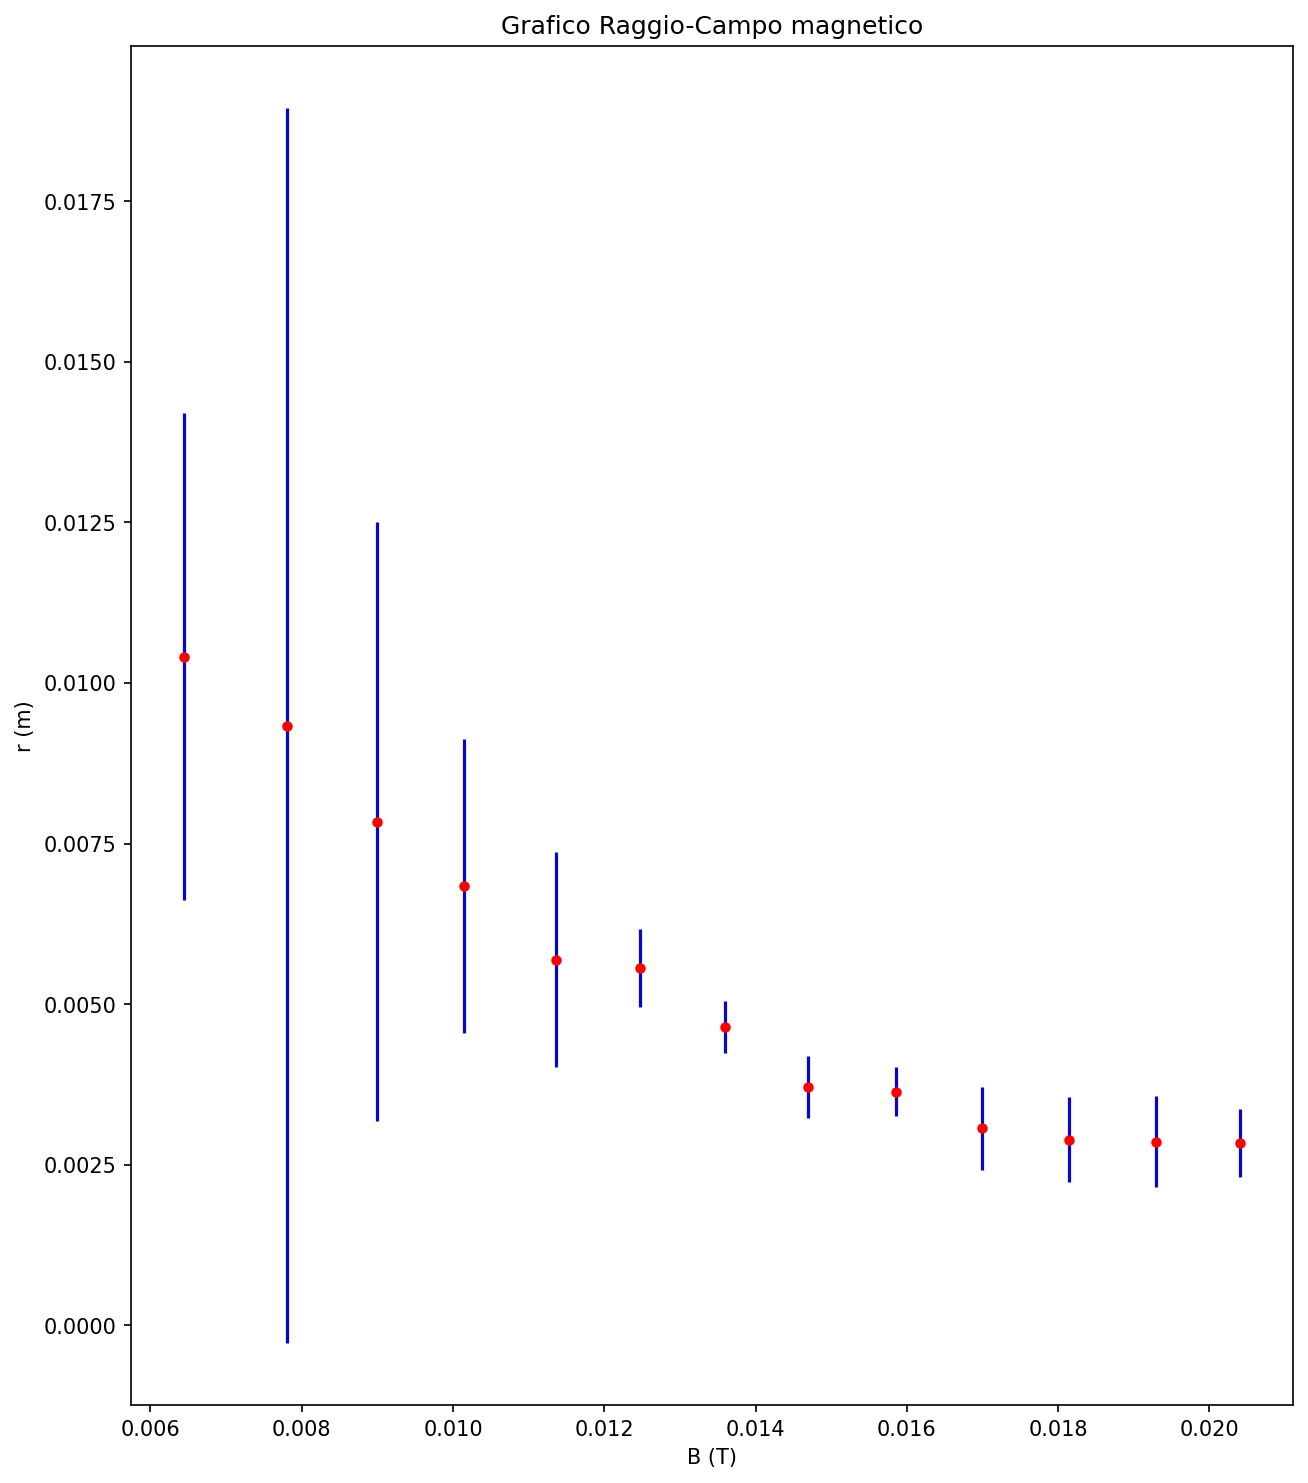

In [2294]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 12), dpi=150)
ax.errorbar(df['B (T)'], df['r (m)'], xerr=np.zeros_like(df['B (T)']), yerr=df['$\sigma_r$ (m)'], color='red', ecolor='blue', marker='o', markersize=4, linestyle='')
ax.set_xlabel('B (T)')
ax.set_ylabel('r (m)')
plt.title('Grafico Raggio-Campo magnetico')
plt.show()

Per prima cosa supponiamo $v_0=0\,\dfrac{m}{s}$, dunque analiziamo il lavoro fatto nel paper utilizzando le loro approssimazioni. La formula su cui applicare il fit è dunque:

$$r={\sqrt{\dfrac{2\,V_E}{b}}}\dfrac{1}{B}$$

dove $b=\dfrac{e}{m_e}$ e $V_E=235\,V$.\
Usando la libreria "minuit" si ottiene:

In [2295]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math
def modello_iniziale(x,par):
    y=math.sqrt(2*par[1]/par[0])/x
    return y
B=np.array(df['B (T)'])
r=np.array(df['r (m)'])
sigma_r=np.array(df['$\sigma_r$ (m)'])
V_E=235
least_squares_modello_iniziale = LeastSquares(B, r, sigma_r, modello_iniziale)
m = Minuit(least_squares_modello_iniziale, (4.93*10**9, 100), name=("b","V"))
m.limits=[(1e11,1.8e11),(V_E,None)]
m.values["V"]=V_E
m.fixed["V"]=True
m.errors["V"]=0
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 35               │
│ EDM = 3.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │ 0.131e12  │ 0.012e12  │            │            │  1e+11  │ 1.8e+11 │       │
│ 1 │ V    │  2.35e2   │  0.00e2   │            │            │   235   │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       b       V │
├───┼─────────────────┤
│ b │ 1.44e+2       0 │
│ V │       0       0 │
└───┴─────────────────┘

In [2296]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 40               │
│ EDM = 3.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │ 0.131e12  │ 0.012e12  │            │            │  1e+11  │ 1.8e+11 │       │
│ 1 │ V    │  2.35e2   │  0.00e2   │            │            │   235   │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       b       V │
├───┼─────────────────┤
│ b │ 1.44e+2       0 │
│ V │       0       0 │
└───┴─────────────────┘

In [2297]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 45               │
│ EDM = 3.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │ 0.131e12  │ 0.012e12  │ -0.011e12  │  0.013e12  │  1e+11  │ 1.8e+11 │       │
│ 1 │ V    │  2.35e2   │  0.00e2   │            │            │   235   │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           b           │
├──────────┼───────────┬───────────┤
│  Error   │ -0.011e12 │ 0.013e12  │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬─────────────────┐
│   │       b       V │
├───┼─────────────────┤
│ b │ 1.44e+2       0 │
│ V │       0       0 │
└───┴─────────────────┘

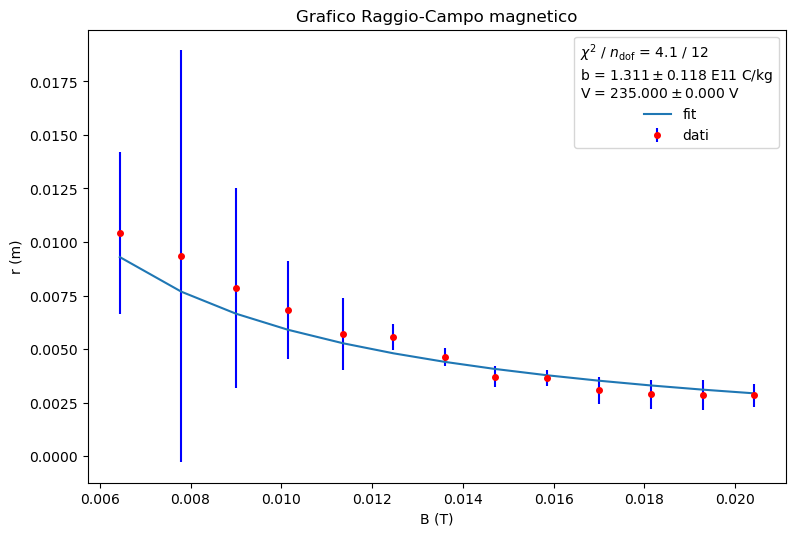

In [2298]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(B, r, sigma_r, fmt="o", label="dati", color='red', ecolor='blue', marker='o', markersize=4, linestyle='')
plt.plot(B, modello_iniziale(B, m.values), label="fit")
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(B) - m.nfit}" ]
fit_info.append(f"{m.parameters[0]} = ${m.values[0]/10**11:.3f} \\pm {m.errors[0]/10**11:.3f}$ E11 C/kg")
fit_info.append(f"{m.parameters[1]} = ${m.values[1]:.3f} \\pm {m.errors[1]:.3f}$ V")
plt.legend(title="\n".join(fit_info))
plt.xlabel('B (T)')
plt.ylabel('r (m)')
plt.title('Grafico Raggio-Campo magnetico')
plt.show()

In [2299]:
from scipy.stats import chi2
from scipy import special
from scipy.optimize import fsolve
n_dof=len(B) - m.nfit
chi_obs=m.fval
p=1-chi2.cdf(chi_obs, n_dof)
print("Il p-value associto a questo fit è: ", p)
def cons(x):
    y=(1-special.erf(x/np.sqrt(2)))/2-p
    return y
Z=int(fsolve(cons, 1))
print("")
print("Il numero di devizioni gaussiane associate è: ", Z)

Il p-value associto a questo fit è:  0.982347556693807

Il numero di devizioni gaussiane associate è:  -2


Una prima stima del rapporto carica-massa dell'elettrone che si ottiene imponendo le velocità iniziali nulle è:

In [2300]:
print("q/m= (", round(m.values["b"]/10**11, 2), "±", round(m.errors["b"]/10**(11),2), ") E11 C/kg.")

q/m= ( 1.31 ± 0.12 ) E11 C/kg.


Il profilo del $\chi^2$ in funzione del parametro è riportato di seguito:

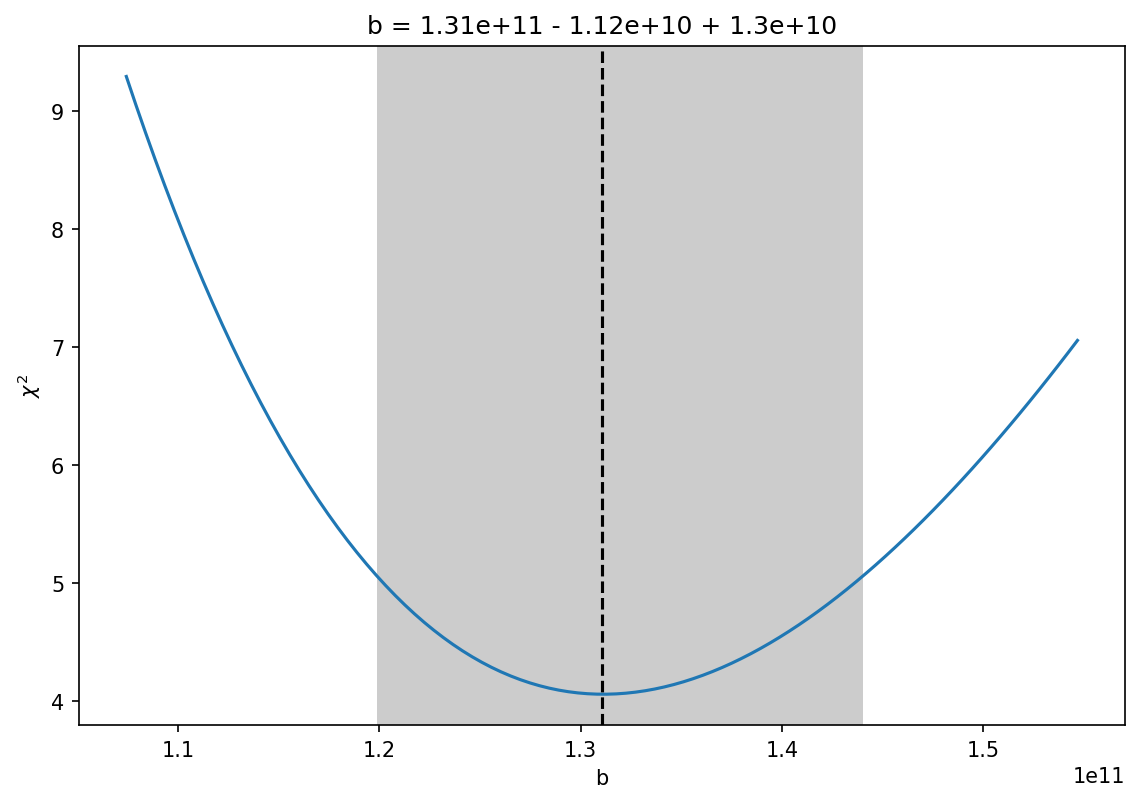

In [2301]:
plt.figure(figsize=(9,6), dpi=150)
x, y = m.draw_profile("b")
plt.ylabel("$\chi^2$")
plt.show()

Questo valore ottenuto è sottostimato, sappiamo infatti dalla teoria che la curva più corretta del modello su cui fare il fit è:

$$r={\sqrt{\left(\dfrac{a^2}{b^2}+\dfrac{2\,V_E}{b}\right)}}\dfrac{1}{B}$$

dove ricordiamo che $b=\dfrac{e}{m_e}$, $a=v_0$ e $V_E=235\,V$.

In [2302]:
def modello(x,par):
    y=math.sqrt(par[0]**2/par[1]**2+2*par[2]/par[1])/x
    return y
B=np.array(df['B (T)'])
r=np.array(df['r (m)'])
sigma_r=np.array(df['$\sigma_r$ (m)'])
least_squares_modello = LeastSquares(B, r, sigma_r, modello)
m = Minuit(least_squares_modello, (5e6, 0.177e12, 100), name=("a", "b", "V"))
m.limits=[(1e2,1e7),(1e10,2e11),(None,None)]
m.values["V"] = V_E
m.errors["V"]=0
m.fixed["V"]=True
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.4)    │              Nfcn = 29               │
│ EDM = 2.69e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    5e6    │    6e6    │            │            │   100   │  1e+07  │       │
│ 1 │ b    │  0.17e12  │  0.10e12  │            │            │  1e+10  │  2e+11  │       │
│ 2 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        V │
├───┼────────────────────────────┤
│ a │ 3.76e+15    5e+19        0 │
│ b │    5e+19 6.66e+23        0 │
│ V │        0        0        0 │
└───┴────────────────────────────┘

In [2303]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.4)    │              Nfcn = 39               │
│ EDM = 2.69e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    5e6    │    6e6    │            │            │   100   │  1e+07  │       │
│ 1 │ b    │  0.17e12  │  0.10e12  │            │            │  1e+10  │  2e+11  │       │
│ 2 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        V │
├───┼────────────────────────────┤
│ a │ 1.53e+16 2.03e+20        0 │
│ b │ 2.03e+20 2.71e+24        0 │
│ V │        0        0        0 │
└───┴────────────────────────────┘

In [2304]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.4)    │              Nfcn = 259              │
│ EDM = 2.69e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.2e6   │   6.0e6   │   -5.2e6   │   3.4e6    │   100   │  1e+07  │       │
│ 1 │ b    │ 0.174e12  │ 0.100e12  │ -0.054e12  │  0.026e12  │  1e+10  │  2e+11  │       │
│ 2 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -5.2e6   │   3.4e6   │ -0.054e12 │ 0.026e12  │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   True    │   False   │   False   │   True    │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬────────────────────────────┐
│   │        a        b        V │
├───┼────────────────────────────┤
│ a │ 1.53e+16 2.03e+20        0 │
│ b │ 2.03e+20 2.71e+24        0 │
│ V │        0        0        0 │
└───┴────────────────────────────┘

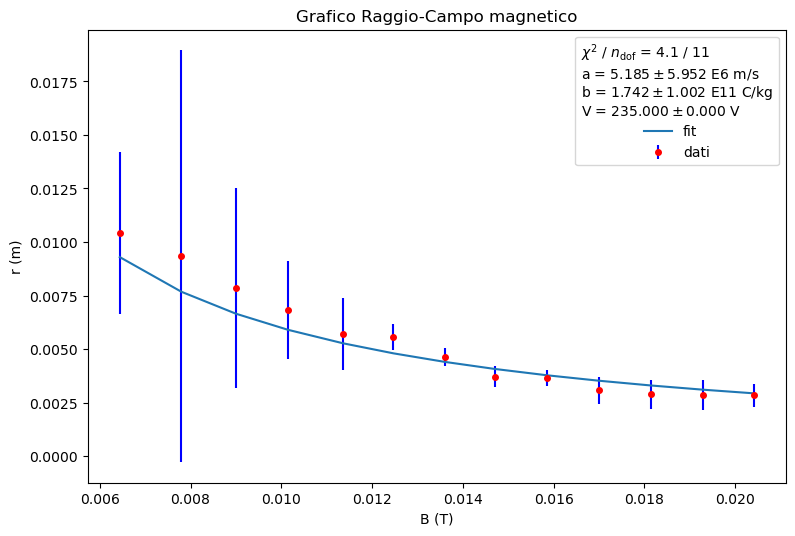

In [2305]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(B, r, sigma_r, fmt="o", label="dati", color='red', ecolor='blue', marker='o', markersize=4, linestyle='')
plt.plot(B, modello(B, m.values), label="fit")
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(B) - m.nfit}" ]
fit_info.append(f"{m.parameters[0]} = ${m.values[0]/10**6:.3f} \\pm {m.errors[0]/10**6:.3f}$ E6 m/s")
fit_info.append(f"{m.parameters[1]} = ${m.values[1]/10**11:.3f} \\pm {m.errors[1]/10**11:.3f}$ E11 C/kg")
fit_info.append(f"{m.parameters[2]} = ${m.values[2]:.3f} \\pm {m.errors[2]:.3f}$ V")
plt.legend(title="\n".join(fit_info))
plt.xlabel('B (T)')
plt.ylabel('r (m)')
plt.title('Grafico Raggio-Campo magnetico')
plt.show()

In [2306]:
n_dof=len(B) - m.nfit
chi_obs=m.fval
p=1-chi2.cdf(chi_obs, n_dof)
print("Il p-value associto a questo fit è: ", p)
def cons(x):
    y=(1-special.erf(x/np.sqrt(2)))/2-p
    return y
Z=int(fsolve(cons, 1))
print("")
print("Il numero di devizioni gaussiane associate è: ", Z)

Il p-value associto a questo fit è:  0.9681593443311471

Il numero di devizioni gaussiane associate è:  -1


Le quantità finali ottenute dal fit, inserendo come dati iniziali più o meno l'ordine di grandezza che ci si aspetta essi assumano, sono le seguenti:

In [2307]:
print("La stima della velocità iniziale è: v_0=(", round(m.values[0]/10**6, 2), "±", round(m.errors[0]/10**6, 2), ") E6 m/s.")
print("")
print("Il rapporto carica-massa dell'elettrone è: q/m=(", round(m.values[1]/10**11, 2), "±", round(m.errors[1]/10**11, 2), ") E11 C/kg.")

La stima della velocità iniziale è: v_0=( 5.19 ± 5.95 ) E6 m/s.

Il rapporto carica-massa dell'elettrone è: q/m=( 1.74 ± 1.0 ) E11 C/kg.


I profili del $\chi^2$ in funzione dei parametri sono riportati di seguito:

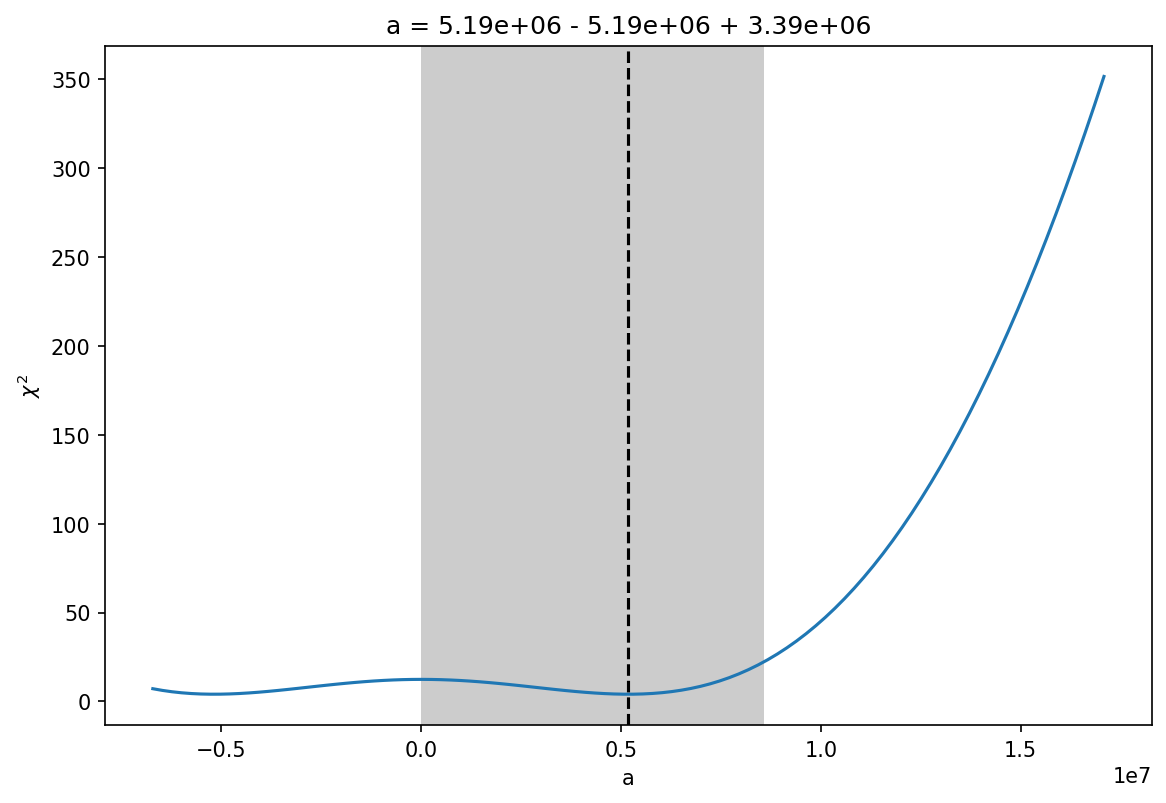

In [2308]:
plt.figure(figsize=(9,6), dpi=150)
x, y = m.draw_profile("a")
plt.ylabel("$\chi^2$")
plt.show()

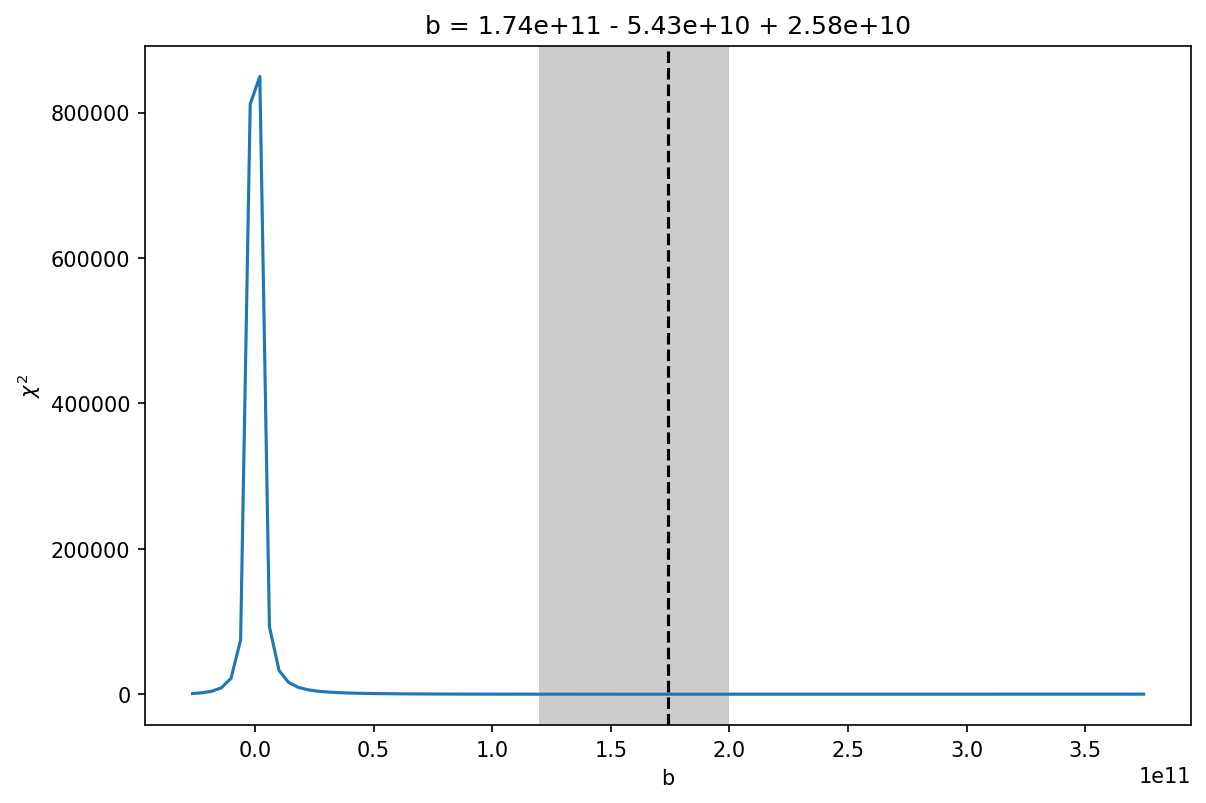

In [2309]:
plt.figure(figsize=(9,6), dpi=150)
x, y = m.draw_profile("b")
plt.ylabel("$\chi^2$")
plt.show()

Dall'esperimento di Millikan abbiamo una stima della carica elementare $e$ dell'elettrone pari a $e=(1.602 \, \pm \, 0.002 )\cdot 10^{-19}\, C$, quindi dal rapporto stimato sopra possiamo rifare il con questo valore di $e$ per stimare $m_e$:

In [2310]:
e=1.602*10**(-19)
err_e=0.002*10**(-19)
def modello_e(x,par):
    y=math.sqrt((par[0]*par[2]/par[1])**2+2*par[3]*par[2]/par[1])/x
    return y
B=np.array(df['B (T)'])
r=np.array(df['r (m)'])
sigma_r=np.array(df['$\sigma_r$ (m)'])
least_squares_modello = LeastSquares(B, r, sigma_r, modello_e)
m = Minuit(least_squares_modello, (5e6, 1.602e-12, 9e-31, 100), name=("a", "e", "m", "V"))
m.limits=[(None,None),(None,None),(9e-31,9.5e-31), (None, None)]
m.values["a"] = 5.19e6
m.errors["a"]=5.95e6
m.fixed["a"]=True
m.values["V"] = V_E
m.errors["V"]=0
m.fixed["V"]=True
m.values["e"] = e
m.errors["e"]=err_e
m.fixed["e"]=True
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 21               │
│ EDM = 4.24e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    5e6    │    6e6    │            │            │         │         │  yes  │
│ 1 │ e    │ 160.2e-21 │  0.2e-21  │            │            │         │         │  yes  │
│ 2 │ m    │ 0.919e-30 │ 0.026e-30 │            │            │  9e-31  │ 9.5e-31 │       │
│ 3 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │        a        e        m        V │
├───┼─────────────────────────────────────┤
│ a │        0        0        0        0 │
│ e │        0        0        0        0 │
│ m │        0        0 4.56e-63        0 │
│ V │        0        0        0        0 │
└───┴─────────────────────────────────────┘

In [2311]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 26               │
│ EDM = 4.24e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    5e6    │    6e6    │            │            │         │         │  yes  │
│ 1 │ e    │ 160.2e-21 │  0.2e-21  │            │            │         │         │  yes  │
│ 2 │ m    │ 0.919e-30 │ 0.026e-30 │            │            │  9e-31  │ 9.5e-31 │       │
│ 3 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │        a        e        m        V │
├───┼─────────────────────────────────────┤
│ a │        0        0        0        0 │
│ e │        0        0        0        0 │
│ m │        0        0 4.56e-63        0 │
│ V │        0        0        0        0 │
└───┴─────────────────────────────────────┘

In [2312]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 26               │
│ EDM = 4.24e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    5e6    │    6e6    │            │            │         │         │  yes  │
│ 1 │ e    │ 160.2e-21 │  0.2e-21  │            │            │         │         │  yes  │
│ 2 │ m    │ 0.919e-30 │ 0.026e-30 │ -0.019e-30 │ 0.031e-30  │  9e-31  │ 9.5e-31 │       │
│ 3 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           m           │
├──────────┼───────────┬───────────┤
│  Error   │-0.019e-30 │ 0.031e-30 │
│  Valid   │   True    │   True    │
│ At Limit │   True    │   True    │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬─────────────────────────────────────┐
│   │        a        e        m        V │
├───┼─────────────────────────────────────┤
│ a │        0        0        0        0 │
│ e │        0        0        0        0 │
│ m │        0        0 4.56e-63        0 │
│ V │        0        0        0        0 │
└───┴─────────────────────────────────────┘

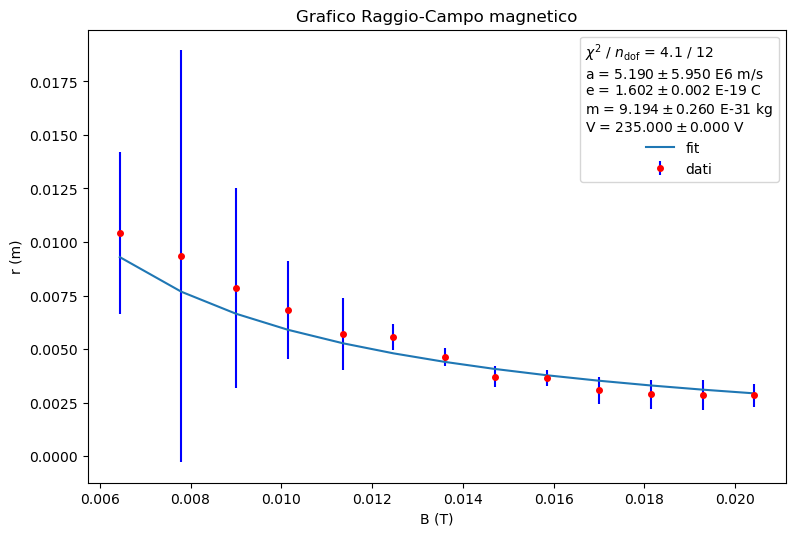

In [2313]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(B, r, sigma_r, fmt="o", label="dati", color='red', ecolor='blue', marker='o', markersize=4, linestyle='')
plt.plot(B, modello_e(B, m.values), label="fit")
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(B) - m.nfit}" ]
fit_info.append(f"{m.parameters[0]} = ${m.values[0]/10**6:.3f} \\pm {m.errors[0]/10**6:.3f}$ E6 m/s")
fit_info.append(f"{m.parameters[1]} = ${m.values[1]/10**(-19):.3f} \\pm {m.errors[1]/10**(-19):.3f}$ E-19 C")
fit_info.append(f"{m.parameters[2]} = ${m.values[2]/10**(-31):.3f} \\pm {m.errors[2]/10**(-31):.3f}$ E-31 kg")
fit_info.append(f"{m.parameters[3]} = ${m.values[3]:.3f} \\pm {m.errors[3]:.3f}$ V")
plt.legend(title="\n".join(fit_info))
plt.xlabel('B (T)')
plt.ylabel('r (m)')
plt.title('Grafico Raggio-Campo magnetico')
plt.show()

In [2314]:
n_dof=len(B) - m.nfit
chi_obs=m.fval
p=1-chi2.cdf(chi_obs, n_dof)
print("Il p-value associto a questo fit è: ", p)
def cons(x):
    y=(1-special.erf(x/np.sqrt(2)))/2-p
    return y
Z=int(fsolve(cons, 1))
print("")
print("Il numero di devizioni gaussiane associate è: ", Z)

Il p-value associto a questo fit è:  0.9823481193351922

Il numero di devizioni gaussiane associate è:  -2


Le quantità finali ottenute dal fit, inserendo come dati iniziali più o meno l'ordine di grandezza che ci si aspetta essi assumano, sono le seguenti:

In [2315]:
print("La massa dell'elettrone è: m=(", round(m.values[2]/10**(-31), 2), "±", round(m.errors[2]/10**(-31),2), ") E-31 kg.")

La massa dell'elettrone è: m=( 9.19 ± 0.26 ) E-31 kg.


Il profilo del $\chi^2$ in funzione del parametro è riportato di seguito:

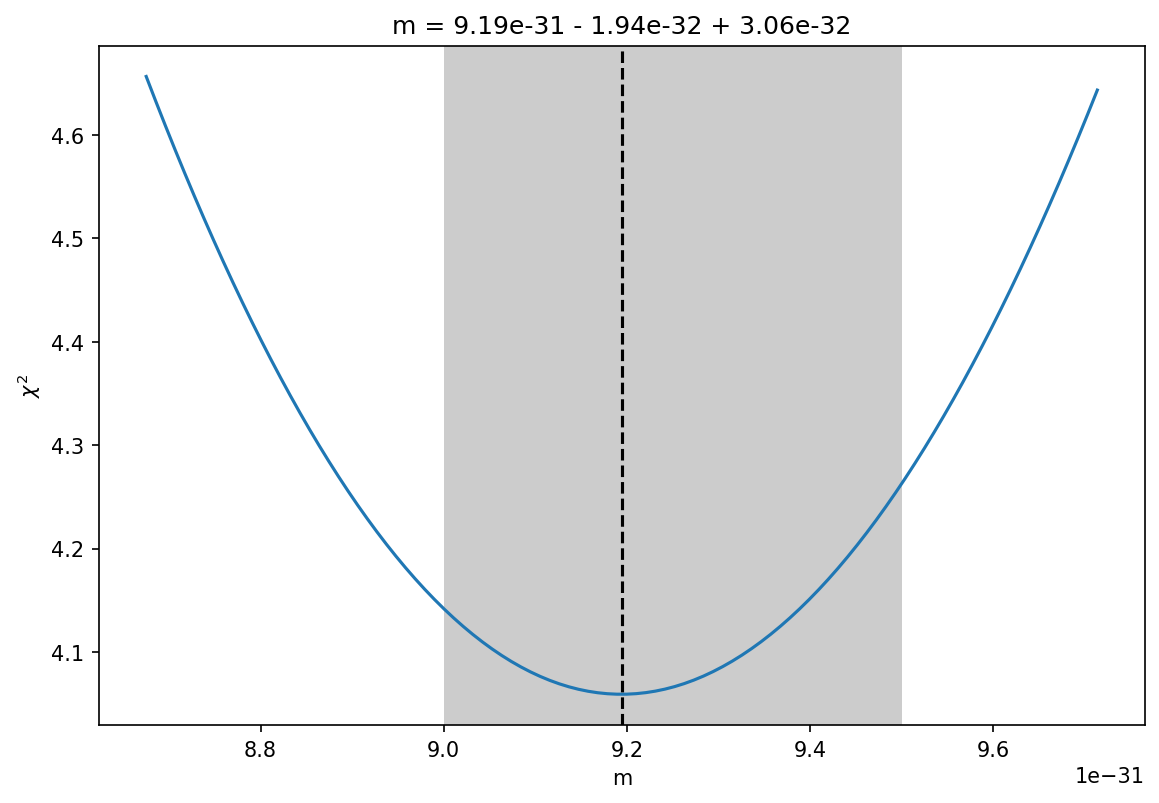

In [2316]:
plt.figure(figsize=(9,6), dpi=150)
x, y = m.draw_profile("m")
plt.ylabel("$\chi^2$")
plt.show()

Come si può vedere dalle stime ottenute gli intervalli di confidenza comprendono i valori rilasciati dal CODATA.

Supposto corretto il valore appena ottenuto della massa dell'elettrone, proviamo a ricavare le velocità iniziali ipotetiche di emissione degli elettroni per effetto termoionico.\
Invertendo le formule discusse precedentemente, si giunge alla seguente relazione:

$$\displaystyle v_0=\dfrac{e}{m_e}\sqrt{B^2\,r^2-\dfrac{2\,V_E}{\dfrac{e}{m_e}}}$$

Calcolando l'energia cinetica degli elettroni come: $E=\dfrac{1}{2}m_ev_0^2$, si evidenzia la seguente distribuzione:

La velocità minima registrata è:  0.86  E6 m/s

La media delle energie cinetiche iniziali è pari a:  1.68  E-17 J

La devizione standard campionaria corretta associta è:  1.29  E-17 J


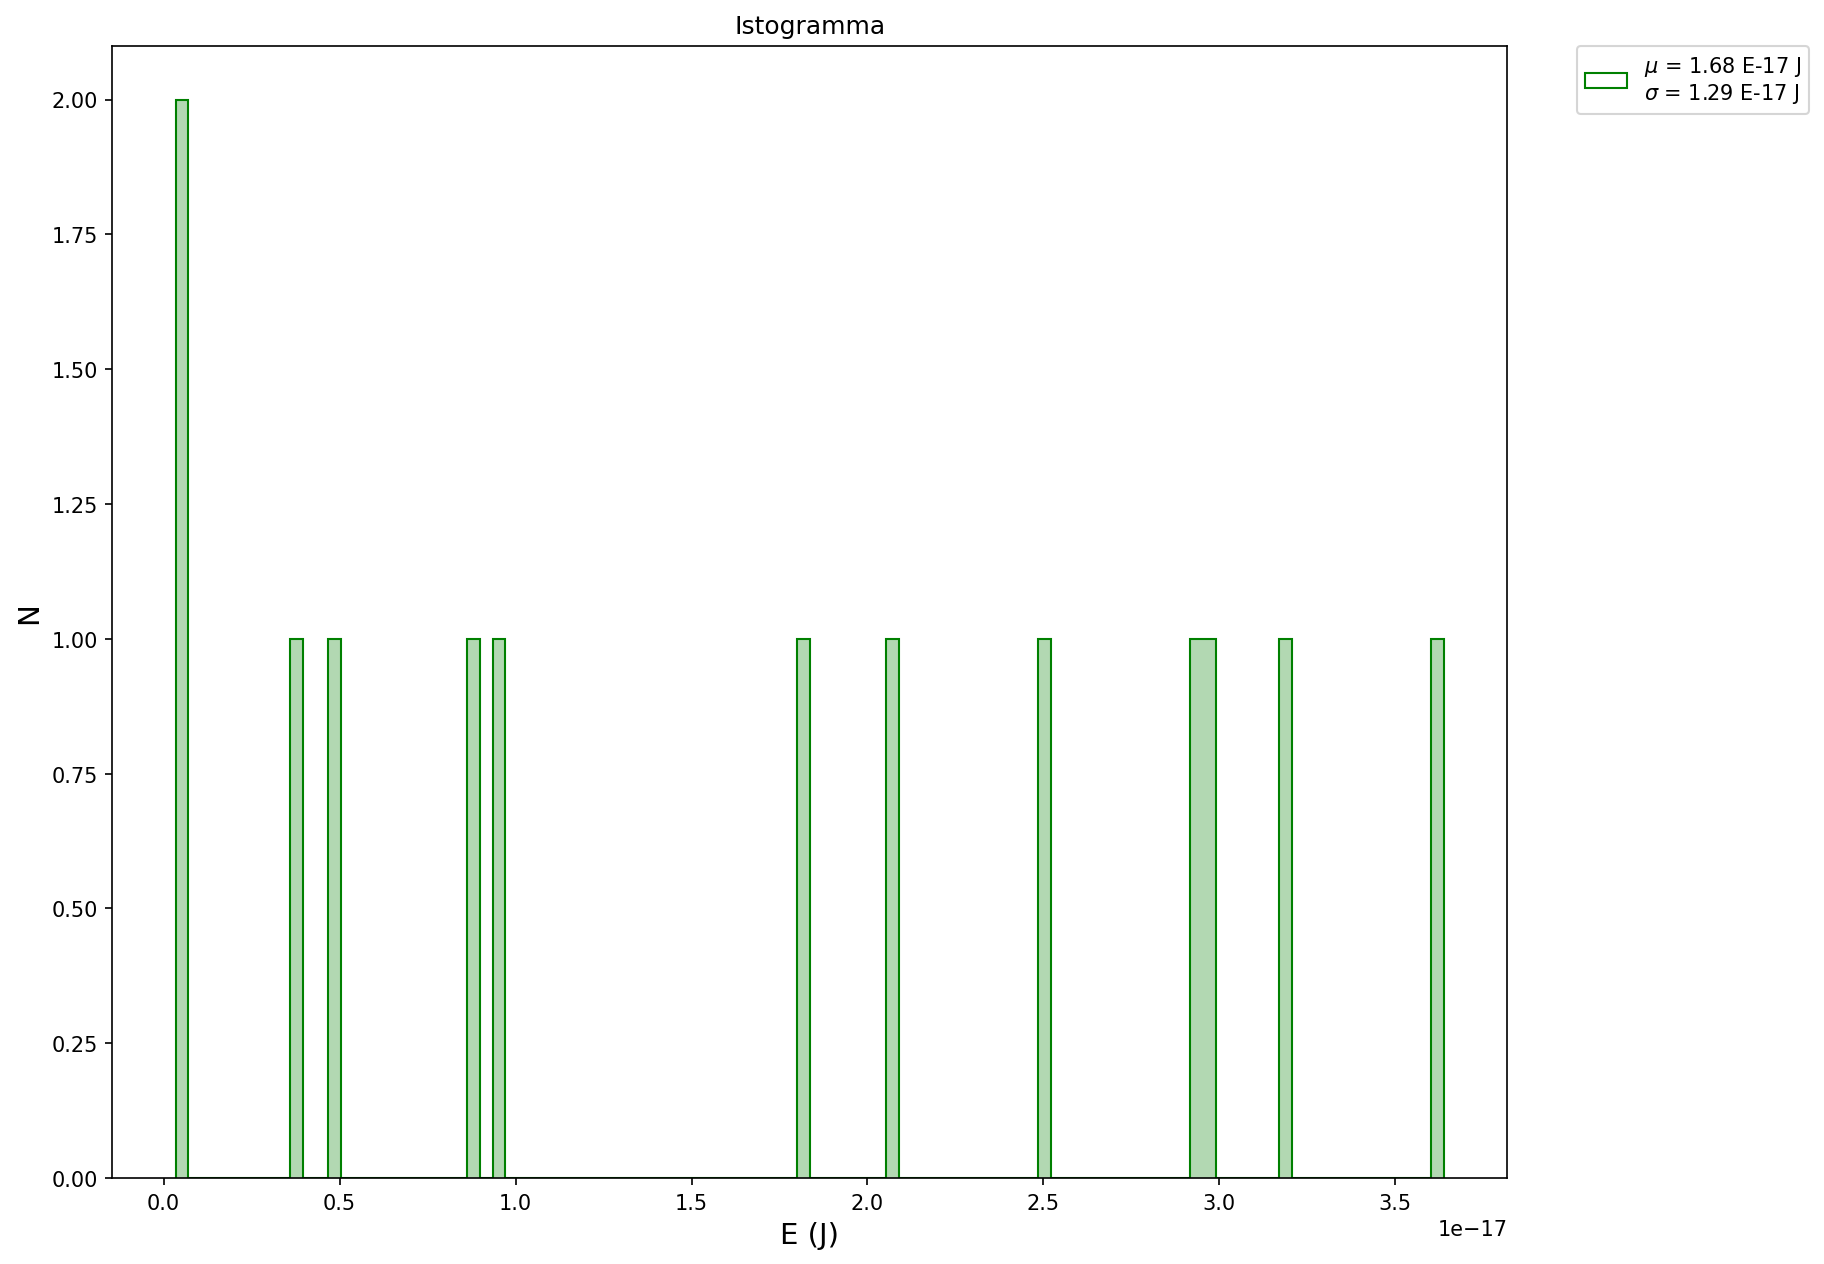

In [2317]:
v_0=(m.values[1]*np.sqrt((B*r)**2-2*V_E*m.values[2]/m.values[1]))/m.values[2]
media_v_0=v_0.mean()
std_v_0=v_0.std(ddof=1)/np.sqrt(len(v_0))
E=1/2*m.values[2]*v_0**2
media_E=E.mean()
std_E=E.std(ddof=1)
print("La velocità minima registrata è: ", round(v_0.min()/1e6,2)," E6 m/s")
print("")
print("La media delle energie cinetiche iniziali è pari a: ", round(media_E/(10**(-17)),2)," E-17 J")
print("")
print("La devizione standard campionaria corretta associta è: ", round(std_E/(10**(-17)),2)," E-17 J")
nbins=100
plt.figure(figsize=(12,10), dpi=150)
n, bins, patches = plt.hist(E, nbins, density=False, histtype=u'step', range=(E.min(), E.max()), label = r"$\mu$ = {:.2f} E-17 J".format(media_E/10**(-17))+"\n"+ r"$\sigma$ = {:.2f} E-17 J".format(std_E/10**(-17)),color='green')
plt.hist(E, nbins, density=False, range=(E.min(), E.max()),alpha=0.3,color='green')
plt.xlabel("E (J)", size=14)
plt.ylabel("N", size=14)
plt.title("Istogramma")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Purtroppo i dati sono insufficienti per mostrare con chiarezza la distribuzione delle velocità, che dovrebbe essere una Maxwell-Boltzmann, la quale è limitata sulle ascisse da una velocità limite dovuta alla presenza del potenziale di estrazione del metallo utilizzato per emettere elettroni.\
Dai dati analizzati si ha che la velocità minima registrata è $min(v_0)=0.863\cdot 10^6\, \dfrac{m}{s}$, dunque deve valere sicuramente che:

$$min(v_0)\geq \sqrt{\dfrac{2\,e\,V_{est}}{m_e}}$$

Da cui possiamo dire che:

$$V_{est}\leq\dfrac{m_e}{2\,e}min(v_0^2)$$

In [2318]:
print("Il limite superiore del potenziale di estrazione è pertanto: ", round(m.values[2]/(2*m.values[1])*(v_0.min())**2, 2), " V")

Il limite superiore del potenziale di estrazione è pertanto:  2.14  V


Dall'esperimento di Millikan si è ottenuti anche una stima della costante di Boltzmann $k_B= (1.381 \pm 0.002)\cdot 10^{-23} \dfrac{J}{K}$. Tentiamo quindi di evidenziare quale distribuzione seguono l'energie degli elettroni appena fuoriescono dal metallo.

Dalla meccanica quantistica sappiamo che gli elettroni seguono una distribuzione di Fermi-Dirac di questo tipo:

$$f(E)=A\dfrac{\sqrt{E}}{1+\mbox{e}^{\frac{E-E_F}{k_B\,T}}}$$

dove $T$ è la temperatura assoluta degli elettroni, $E_F$ è l'energia di Fermi del metallo e $A$ è una costante di normalizzazione.
Inoltre sappiamo che per temperature dell'ordine dei $10^3 K$ ed energie di Fermi dell'ordine degli elettronvolt, il termine $\mbox{e}^{\frac{E-E_F}{k_B\,T}}\gg 1$ per energie presenti nella coda della distribuzione (quelle interessano l'effetto termoionico per cui vale $E \gg e\,V_{est}>E_F$). Dunque la distribuzione diviene una distribuzione di Maxwell-Boltzmann:

$$f(E)\approx\,A\,\sqrt{E}\,e^{-\frac{E}{k_B\,T}}$$

Tuttavia a causa del potenziale di estrazione $V_{est}$ non tutte le velocità possono essere osservate, dunque esse avranno una probabilità nulla se $E<e\,V_{est}$. Questa può essere vista come una probabilità condizionata, intatti è vero che:

$$P(E\in [0,\,+\infty]\, |\, E\geq e\,V_{est})=\dfrac{P(E\in [0,\,+\infty] \cap E\geq e\,V_{est})}{P(E\geq e\,V_{est})}$$

Supponendo che le velocità si distribuiscono secondo una Maxwell-Boltzmann:

$$\displaystyle P(E\in [0,\,+\infty]\, |\, E\geq e\,V_{est})=\frac{\int_{e\,V_{est}}^{E}f(E^{\prime})dE^{\prime}}{\int_{e\,V_{est}}^{+\infty}f(E^{\prime})dE^{\prime}}$$

Modelliziamo questo fenomeno moltiplicando la distribuzione di Maxwell-Boltzmann per la distribuzione $\Theta_H(x)$ (distribuzione di Heaviside) che assume valore 0 se $x<0$ e 1 se $x\geq 0$.
La distribuzione risultante è:

$$f(E)=A\,\Theta_H(E-e\,V_{est})\,\sqrt{E}\,\mbox{e}^{-\frac{E}{k_B\,T}}$$

La costante di normalizzazione si può ottenere imponendo che $\displaystyle \int_{0}^{+\infty}A\,\Theta_H(E-e\,V_{est})\,\sqrt{E}\,\mbox{e}^{-\frac{E}{k_B\,T}}\,dE=1$ e dunque:

$$\displaystyle A=\dfrac{2}{k_B\,T\,\bigg[\sqrt{\pi\,k_B\,T}\,\mbox{erfc}\left({\sqrt{\dfrac{e\,V_{est}}{k_B\,T}}}\right)+2\,\sqrt{e\,V_{est}}\,\mbox{e}^{-\tfrac{e\,V_{est}}{k_B\,T}}\bigg]}$$

Pertanto la pdf del modello teorico è la seguente:

$$\displaystyle f(E)=\dfrac{2\,\Theta_H(E-e\,V_{est})\,\sqrt{E}\,\mbox{e}^{-\frac{E}{k_B\,T}}}{k_B\,T\,\bigg[\sqrt{\pi\,k_B\,T}\,\mbox{erfc}\left({\sqrt{\dfrac{e\,V_{est}}{k_B\,T}}}\right)+2\,\sqrt{e\,V_{est}}\,\mbox{e}^{-\tfrac{e\,V_{est}}{k_B\,T}}\bigg]}$$

Mostriamo questa distribuzione su un grafico (riportando l'energia in $eV$ in scala semilogaritmica):

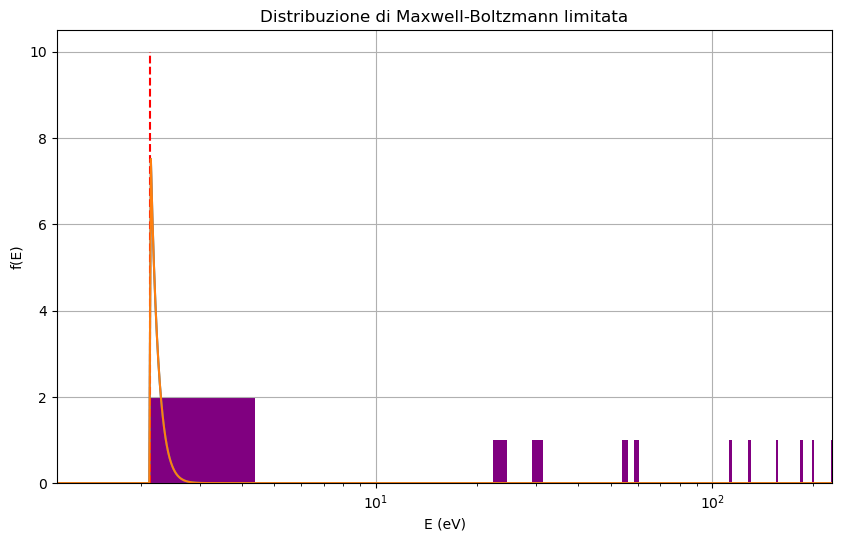

In [2319]:
k_B=1.381e-23
V_est=m.values[2]/(2*m.values[1])*(v_0.min())**2-0.01
e=m.values[1]
m_e=m.values[2]
T=1300
A=k_B*T*(np.sqrt(np.pi*k_B*T)*special.erfc(np.sqrt(e*V_est/(k_B*T)))+2*np.sqrt(e*V_est)*np.exp(-(e*V_est)/(k_B*T)))/2
def Maxwell_Boltzmann(x):
    y=(np.heaviside(x-e*V_est, 1)*np.sqrt(x)*np.exp(-x/(k_B*T)))/A
    return y
x= np.linspace(V_est-1, E.max()/e, 10000)
y= e*Maxwell_Boltzmann(x*e)
plt.figure(figsize=(10,6), dpi=100)
plt.plot(x, y)
plt.plot((V_est,V_est), (0, 10), color='r', linestyle='--')
plt.hist(E/e, bins=100, density=False, range=(E.min()/e,E.max()/e), color='purple')
plt.ylim(bottom=0)
plt.xlim(V_est-1,E.max()/e)
plt.grid()
plt.semilogx(x, y)
plt.xlabel('E (eV)')
plt.ylabel('f(E)')
plt.title('Distribuzione di Maxwell-Boltzmann limitata')
plt.show()

La cumulativa della distribuzione ottenuta è:

$$F(E)=\dfrac{2\,\Theta(E-e\,V_{est})}{\bigg[\sqrt{\pi}\,\mbox{erfc}\left({\sqrt{\dfrac{e\,V_{est}}{k_B\,T}}}\right)+2\,\sqrt{\dfrac{e\,V_{est}}{k_B\,T}}\,\mbox{e}^{-\tfrac{e\,V_{est}}{k_B\,T}}\bigg]}\bigg[\Gamma\left(\frac{3}{2},\,\frac{e\,V_{est}}{k_B\,T}\right)-\Gamma\left(\frac{3}{2},\,\frac{E}{k_B\,T}\right)\bigg]$$

dove $\displaystyle \Gamma(a,x)=\int_{x}^{+\infty}t^{a-1}\mbox{e}^{-t}dt$ è la funzione Gamma di Eulero incompleta.\
Graficando questa funzione con i gradini associati alle varie energie si ottiene:

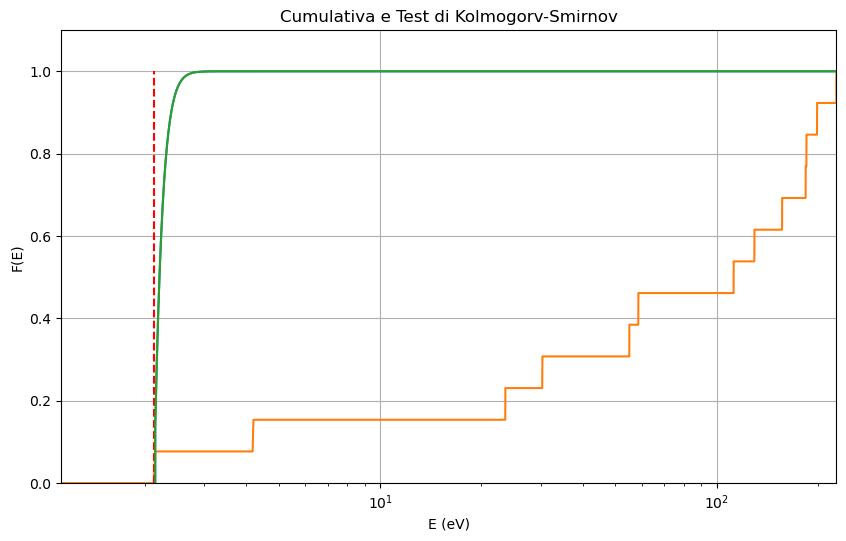

In [2320]:
from scipy.special import gamma, gammaincc
def C_M_B(x):
    I=(k_B*T/A)*np.sqrt(k_B*T)**np.heaviside(x-e*V_est, 1)*(gammaincc(1.5, e*V_est/(k_B*T))-gammaincc(1.5, x/(k_B*T)))*gamma(1.5)
    return I
def samplec(x):
    return len(E[E/e<=x])/len(E)
sc = (np.vectorize(samplec))(x)
Y=C_M_B(x*e)
plt.figure(figsize=(10,6), dpi=100)
plt.plot(x,Y)
plt.plot(x,sc)
plt.plot((V_est,V_est), (0, 1), color='r', linestyle='--')
plt.ylim(0,1.1)
plt.xlim(V_est-1,E.max()/e)
plt.grid()
plt.semilogx(x, Y)
plt.xlabel('E (eV)')
plt.ylabel('F(E)')
plt.title('Cumulativa e Test di Kolmogorv-Smirnov')
plt.show()

Applicando il test di Kolmogorov-Smirnov:

In [2322]:
from scipy import stats
k = np.abs(Y-sc).max()
D, p = stats.kstest(E, C_M_B)
print("D={:.4f}, p={:.4f}".format(D, p))

def cons(x):
    y=(1-special.erf(x/np.sqrt(2)))/2-p*1e16/1e16
    return y
Z=int(fsolve(cons, 1))
print("")
print("Il numero di devizioni gaussiane associate è: ", Z)

D=0.9231, p=0.0000

Il numero di devizioni gaussiane associate è:  7


Il test non è molto soddisfacente ($Z=7$), dunque proviamo a minimizzare la somma degli scarti quadratici (distanza di $\mathcal{l}^2$) così definita:

$$S(T,\,V_{est})=\sum_{k=1}^{N}\left|F(T,\,V_{est},\,E_k)-\Theta(E-E_k)\dfrac{n_k}{N}\right|^2$$

dove $E_k$ sono le energie osservate e $n_k$ sono le occorrenze assolute.\
Graficando questa funzione in un plot 3D:

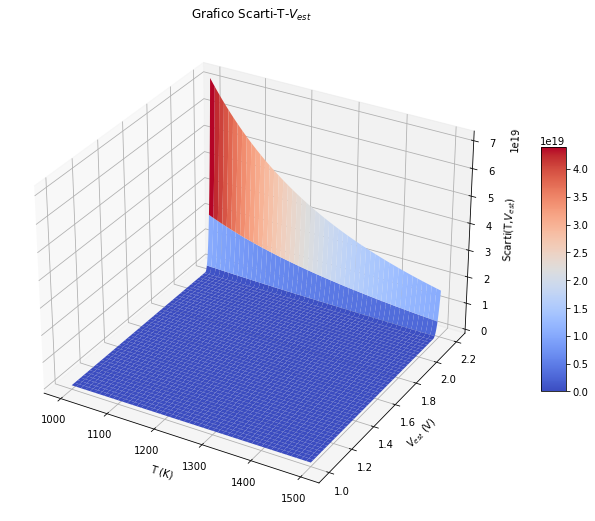

In [2323]:
from mpl_toolkits import mplot3d
from matplotlib import cm
def Scarti(T, V):
    S=0
    for i in range(len(E)):
        S=S+abs((k_B*T/(k_B*T*(np.sqrt(np.pi*k_B*T)*special.erfc(np.sqrt(e*V/(k_B*T)))+2*np.sqrt(e*V)*np.exp(-(e*V)/(k_B*T)))/2))*np.sqrt(k_B*T)**np.heaviside(E[i]-e*V, 1)*(gammaincc(1.5, e*V/(k_B*T))-gammaincc(1.5, E[i]/(k_B*T)))*gamma(1.5)-len(E[E<=E[i]])/len(E))**2
    return S
T_v=np.linspace(1000,1500, 1000)
V_v=np.linspace(1,2.2, 1000)
T, V = np.meshgrid(T_v, V_v)
S = Scarti(T, V)
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(30,-60)
surf = ax.plot_surface(T, V, S, cmap=cm.coolwarm)
ax.set_title('Grafico Scarti-T-$V_{est}$')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('T (K)')
ax.set_ylabel('$V_{est}$ (V)')
ax.set_zlabel('Scarti(T,$V_{est}$)')
plt.show()

Le cui linee di livello sono:

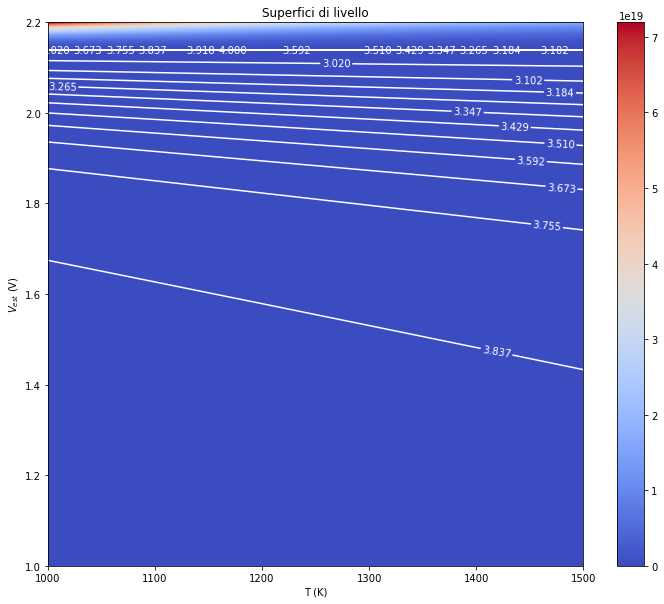

In [2324]:
figure, ax = plt.subplots(figsize=(12,10))
col = ax.pcolormesh(T, V, S, cmap=cm.coolwarm, shading='auto')
con = ax.contour(T, V, S, np.linspace(0, 4, 50), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('Superfici di livello')
ax.axis([T.min(), T.max(), V.min(), V.max()])
ax.set_xlabel('T (K)')
ax.set_ylabel('$V_{est}$ (V)')
figure.colorbar(col)
plt.show()

Cerchiamo il minimo di questa funzione a due variabili con "Gradient descent" che è implimentato in Minuit:

In [2325]:
Scarti.errordef = Minuit.LIKELIHOOD 
m = Minuit(Scarti, T=1200, V=2.12)
m.limits = [(1000, 1300), (1.9, 2.14)]
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.994                      │              Nfcn = 33               │
│ EDM = 2.23e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ T    │  1.29e3   │  0.30e3   │            │            │  1000   │  1300   │       │
│ 1 │ V    │   2.13    │   0.23    │            │            │   1.9   │  2.14   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         T         V │
├───┼─────────────────────┤
│ T │  1.06e+08 -1.09e+03 │
│ V │ -1.09e+03    0.0189 │
└───┴─────────────────────┘

In [2326]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.994                      │              Nfcn = 43               │
│ EDM = 2e-06 (Goal: 0.0001)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ T    │  1.29e3   │  0.25e3   │            │            │  1000   │  1300   │       │
│ 1 │ V    │   2.13    │   0.23    │            │            │   1.9   │  2.14   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        T        V │
├───┼───────────────────┤
│ T │ 6.77e+07     -512 │
│ V │     -512   0.0115 │
└───┴───────────────────┘

In [2327]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.994                      │              Nfcn = 148              │
│ EDM = 2e-06 (Goal: 0.0001)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ T    │  1.294e3  │  0.251e3  │  -0.294e3  │  0.006e3   │  1000   │  1300   │       │
│ 1 │ V    │   2.13    │   0.23    │   -0.17    │    0.23    │   1.9   │  2.14   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           T           │           V           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -294    │     6     │   -0.17   │   0.23    │
│  Valid   │   True    │   True    │   True    │   False   │
│ At Limit │   True    │   True    │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        T        V │
├───┼───────────────────┤
│ T │ 6.77e+07     -512 │
│ V │     -512   0.0115 │
└───┴───────────────────┘

In [2328]:
m.covariance.correlation()

,T,V
T,1,-0.579
V,-0.579,1


In [2329]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,T,1.294e3,0.251e3,-0.294e3,0.006e3,1E+03,1.3E+03,
1,V,2.13,0.23,-0.17,0.23,1.9,2.14,


In [2330]:
print("La temperatura del metallo da cui sono estratti gli elettroni è pari a: T=(", round(m.values["T"], 1)," ± ", round(m.errors["T"], 1), ") K")
print("")
print("Il potenziale di estrazione invece è: V_est=(", round(m.values["V"], 2)," ± ", round(m.errors["V"], 2), ") V")

La temperatura del metallo da cui sono estratti gli elettroni è pari a: T=( 1294.4  ±  250.7 ) K

Il potenziale di estrazione invece è: V_est=( 2.13  ±  0.23 ) V


Proviamo adesso a fare il fit della funzione $r=\sqrt{\dfrac{\left<v_0\right>^2}{b^2}+\dfrac{2\,V}{b}}\dfrac{1}{B}$ cosiderando $\left<v_0\right>$ (media delle velocità iniziali) fissata:

In [2340]:
B=np.array(df['B (T)'])
r=np.array(df['r (m)'])
sigma_r=np.array(df['$\sigma_r$ (m)'])
least_squares_modello = LeastSquares(B, r, sigma_r, modello)
m = Minuit(least_squares_modello, (5.611*10**6, 10**7, 100), name=("a", "b", "V"))
m.limits=[(None,None),(1e11,1e12),(None,None)]
m.values["V"] = V_E
m.errors["V"]=0
m.values["a"]=media_v_0
m.errors["a"]=std_v_0
m.fixed["V"]=True
m.fixed["a"]=True
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 51               │
│ EDM = 7.87e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.4e6   │   0.8e6   │            │            │         │         │  yes  │
│ 1 │ b    │ 0.178e12  │ 0.013e12  │            │            │  1e+11  │  1e+12  │       │
│ 2 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       V │
├───┼─────────────────────────┤
│ a │       0       0       0 │
│ b │       0 1.66e+2       0 │
│ V │       0       0       0 │
└───┴─────────────────────────┘

In [2341]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 56               │
│ EDM = 7.87e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.4e6   │   0.8e6   │            │            │         │         │  yes  │
│ 1 │ b    │ 0.178e12  │ 0.013e12  │            │            │  1e+11  │  1e+12  │       │
│ 2 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       V │
├───┼─────────────────────────┤
│ a │       0       0       0 │
│ b │       0 1.66e+2       0 │
│ V │       0       0       0 │
└───┴─────────────────────────┘

In [2342]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 60               │
│ EDM = 7.87e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.4e6   │   0.8e6   │            │            │         │         │  yes  │
│ 1 │ b    │ 0.178e12  │ 0.013e12  │ -0.012e12  │  0.014e12  │  1e+11  │  1e+12  │       │
│ 2 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           b           │
├──────────┼───────────┬───────────┤
│  Error   │ -0.012e12 │ 0.014e12  │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬─────────────────────────┐
│   │       a       b       V │
├───┼─────────────────────────┤
│ a │       0       0       0 │
│ b │       0 1.66e+2       0 │
│ V │       0       0       0 │
└───┴─────────────────────────┘

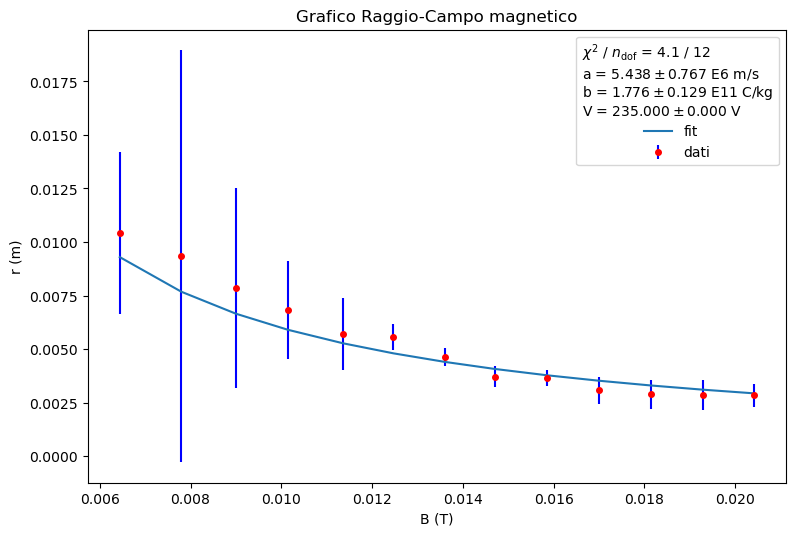

In [2343]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(B, r, sigma_r, fmt="o", label="dati", color='red', ecolor='blue', marker='o', markersize=4, linestyle='')
plt.plot(B, modello(B, m.values), label="fit")
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(B) - m.nfit}" ]
fit_info.append(f"{m.parameters[0]} = ${m.values[0]/10**6:.3f} \\pm {m.errors[0]/10**6:.3f}$ E6 m/s")
fit_info.append(f"{m.parameters[1]} = ${m.values[1]/10**11:.3f} \\pm {m.errors[1]/10**11:.3f}$ E11 C/kg")
fit_info.append(f"{m.parameters[2]} = ${m.values[2]:.3f} \\pm {m.errors[2]:.3f}$ V")
plt.legend(title="\n".join(fit_info))
plt.xlabel('B (T)')
plt.ylabel('r (m)')
plt.title('Grafico Raggio-Campo magnetico')
plt.show()

In [2344]:
n_dof=len(B) - m.nfit
chi_obs=m.fval
p=1-chi2.cdf(chi_obs, n_dof)
print("Il p-value associto a questo fit è: ", p)
def cons(x):
    y=(1-special.erf(x/np.sqrt(2)))/2-p
    return y
Z=int(fsolve(cons, 1))
print("")
print("Il numero di devizioni gaussiane associate è: ", Z)

Il p-value associto a questo fit è:  0.9823481271904506

Il numero di devizioni gaussiane associate è:  -2


In [2345]:
print("Il rapporto carica-massa dell'elettrone è: q/m=(", round(m.values[1]/10**11, 3), "±", round(m.errors[1]/10**11, 3), ") 10^11 C/kg.")

Il rapporto carica-massa dell'elettrone è: q/m=( 1.776 ± 0.129 ) 10^11 C/kg.


Il profilo del $\chi^2$ in funzione del parametro è riportati di seguito:

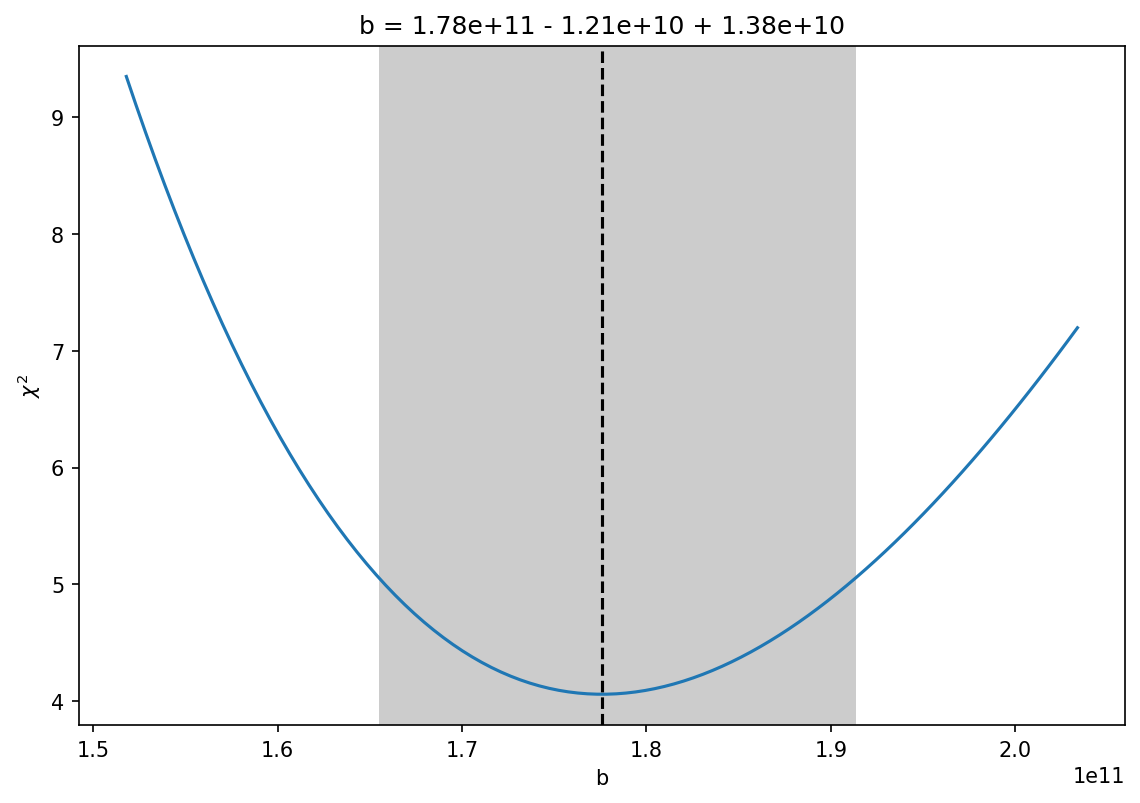

In [2358]:
plt.figure(figsize=(9,6), dpi=150)
x, y = m.draw_profile("b")
plt.ylabel("$\chi^2$")
plt.show()

In [2359]:
B=np.array(df['B (T)'])
r=np.array(df['r (m)'])
sigma_r=np.array(df['$\sigma_r$ (m)'])
least_squares_modello = LeastSquares(B, r, sigma_r, modello_e)
m = Minuit(least_squares_modello, (5e6, 1.602e-12, 9e-31, 100), name=("a", "e", "m", "V"))
m.limits=[(None,None),(None,None),(8.5e-31,9.5e-31), (None, None)]
m.values["a"]=media_v_0
m.errors["a"]=std_v_0
m.fixed["a"]=True
m.values["V"] = V_E
m.errors["V"]=0
m.fixed["V"]=True
m.values["e"] = e
m.errors["e"]=err_e
m.fixed["e"]=True
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 11               │
│ EDM = 1.15e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.4e6   │   0.8e6   │            │            │         │         │  yes  │
│ 1 │ e    │ 160.2e-21 │  0.2e-21  │            │            │         │         │  yes  │
│ 2 │ m    │ 0.90e-30  │ 0.07e-30  │            │            │ 8.5e-31 │ 9.5e-31 │       │
│ 3 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │        a        e        m        V │
├───┼─────────────────────────────────────┤
│ a │        0        0        0        0 │
│ e │        0        0        0        0 │
│ m │        0        0 4.29e-63        0 │
│ V │        0        0        0        0 │
└───┴─────────────────────────────────────┘

In [2360]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 16               │
│ EDM = 1.15e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.4e6   │   0.8e6   │            │            │         │         │  yes  │
│ 1 │ e    │ 160.2e-21 │  0.2e-21  │            │            │         │         │  yes  │
│ 2 │ m    │ 0.90e-30  │ 0.07e-30  │            │            │ 8.5e-31 │ 9.5e-31 │       │
│ 3 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │        a        e        m        V │
├───┼─────────────────────────────────────┤
│ a │        0        0        0        0 │
│ e │        0        0        0        0 │
│ m │        0        0 4.29e-63        0 │
│ V │        0        0        0        0 │
└───┴─────────────────────────────────────┘

In [2361]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (chi2/ndof = 0.3)    │              Nfcn = 16               │
│ EDM = 1.15e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.4e6   │   0.8e6   │            │            │         │         │  yes  │
│ 1 │ e    │ 160.2e-21 │  0.2e-21  │            │            │         │         │  yes  │
│ 2 │ m    │ 0.90e-30  │ 0.07e-30  │ -0.05e-30  │  0.05e-30  │ 8.5e-31 │ 9.5e-31 │       │
│ 3 │ V    │  2.35e2   │  0.00e2   │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           m           │
├──────────┼───────────┬───────────┤
│  Error   │ -0.05e-30 │ 0.05e-30  │
│  Valid   │   True    │   True    │
│ At Limit │   True    │   True    │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬─────────────────────────────────────┐
│   │        a        e        m        V │
├───┼─────────────────────────────────────┤
│ a │        0        0        0        0 │
│ e │        0        0        0        0 │
│ m │        0        0 4.29e-63        0 │
│ V │        0        0        0        0 │
└───┴─────────────────────────────────────┘

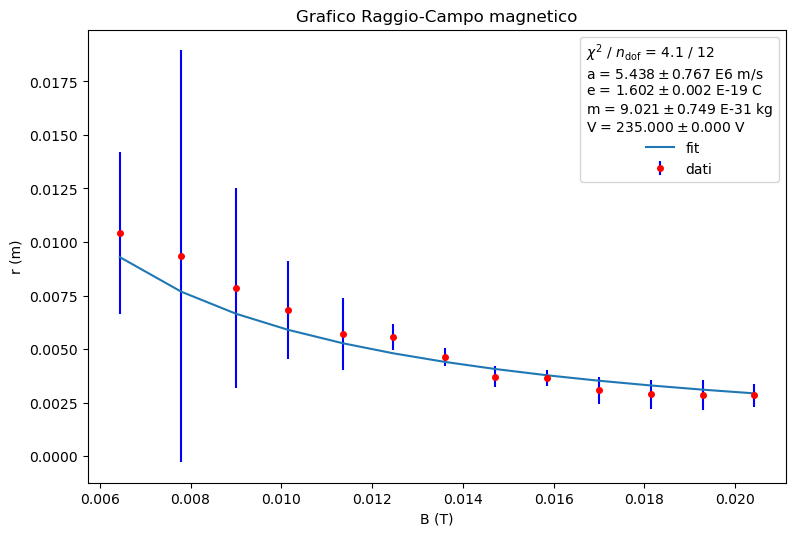

In [2362]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(B, r, sigma_r, fmt="o", label="dati", color='red', ecolor='blue', marker='o', markersize=4, linestyle='')
plt.plot(B, modello_e(B, m.values), label="fit")
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(B) - m.nfit}" ]
fit_info.append(f"{m.parameters[0]} = ${m.values[0]/10**6:.3f} \\pm {m.errors[0]/10**6:.3f}$ E6 m/s")
fit_info.append(f"{m.parameters[1]} = ${m.values[1]/10**(-19):.3f} \\pm {m.errors[1]/10**(-19):.3f}$ E-19 C")
fit_info.append(f"{m.parameters[2]} = ${m.values[2]/10**(-31):.3f} \\pm {m.errors[2]/10**(-31):.3f}$ E-31 kg")
fit_info.append(f"{m.parameters[3]} = ${m.values[3]:.3f} \\pm {m.errors[3]:.3f}$ V")
plt.legend(title="\n".join(fit_info))
plt.xlabel('B (T)')
plt.ylabel('r (m)')
plt.title('Grafico Raggio-Campo magnetico')
plt.show()

In [2363]:
n_dof=len(B) - m.nfit
chi_obs=m.fval
p=1-chi2.cdf(chi_obs, n_dof)
print("Il p-value associto a questo fit è: ", p)
def cons(x):
    y=(1-special.erf(x/np.sqrt(2)))/2-p
    return y
Z=int(fsolve(cons, 1))
print("")
print("Il numero di devizioni gaussiane associate è: ", Z)

Il p-value associto a questo fit è:  0.9823481273170575

Il numero di devizioni gaussiane associate è:  -2


Le quantità finali ottenute dal fit, inserendo come dati iniziali più o meno l'ordine di grandezza che ci si aspetta essi assumano, sono le seguenti:

In [2364]:
print("La massa dell'elettrone è: m=(", round(m.values[2]/10**(-31), 2), "±", round(m.errors[2]/10**(-31),2), ") E-31 kg.")

La massa dell'elettrone è: m=( 9.02 ± 0.75 ) E-31 kg.


Il profilo del $\chi^2$ in funzione del parametro è riportato di seguito:

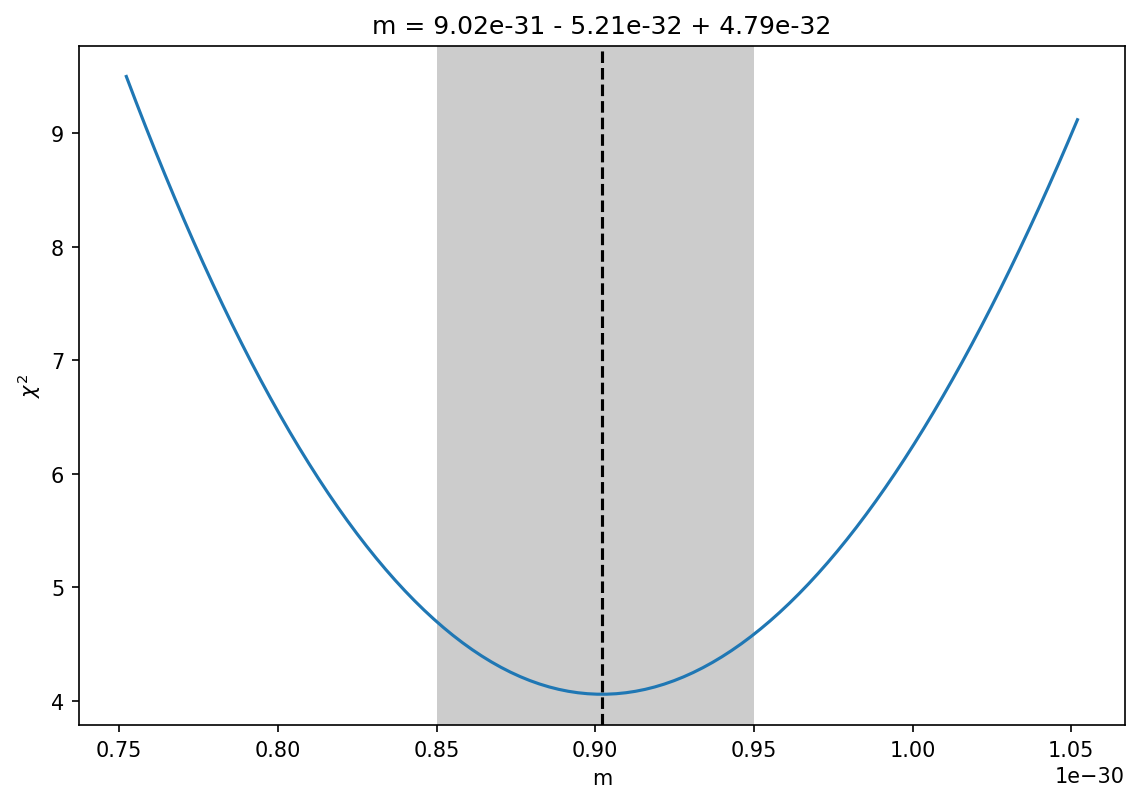

In [2366]:
plt.figure(figsize=(9,6), dpi=150)
x, y = m.draw_profile("m")
plt.ylabel("$\chi^2$")
plt.show()

Come si può vedere ora la stima della massa ottenuta è ancora più prossima a quella rilasciata dal CODATA.

****L'ultimo tentativo che proveremo a fare è quello di individuare la funzione di massima verosomiglianza del $\chi^2$ associata della relazione $r=\sqrt{\dfrac{v_0^2}{b^2}+\dfrac{2\,V_E}{b}}\dfrac{1}{B}$, intendedola come funzione della variabile aleatoria $b$.

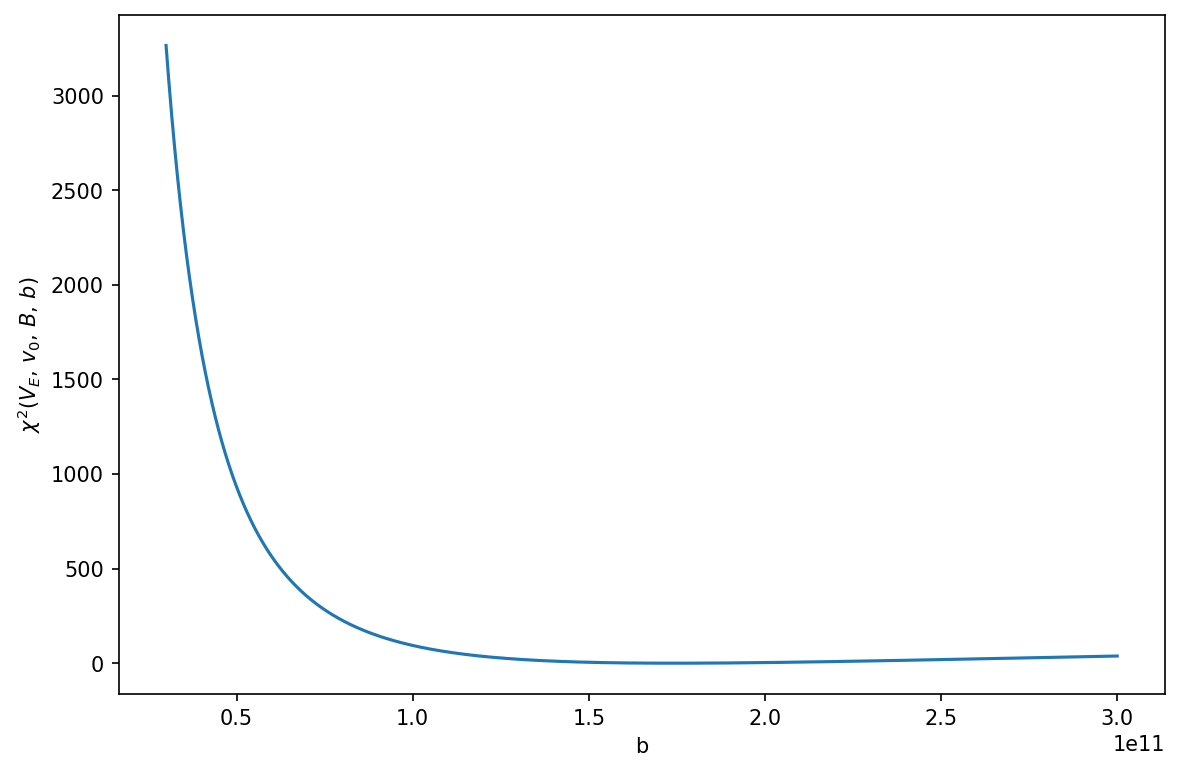

In [2367]:
def f_like(b):
    chi=0
    for k in range(len(B)):
        chi=chi+((r[k]-(np.sqrt((v_0[k])**2/b**2+2*V/b)/B[k]))/sigma_r[k])**2
    return chi
V=235
b_int= np.linspace(3*10**10, 3*10**11, 10000)
plt.figure(figsize=(9,6), dpi=150)
plt.plot(b_int, f_like(b_int))
plt.xlabel('b')
plt.ylabel('$\chi^2(V_E,\, v_0, \, B,\, b)$')
plt.show()

In [2368]:
f_like.errordef = Minuit.LIKELIHOOD 
b_0= 1e11
minuit = Minuit(f_like, b=b_0)
minuit.limits=[(1e11,1e12)]
minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.401e-08                  │              Nfcn = 38               │
│ EDM = 5.4e-08 (Goal: 0.0001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │   174e9   │    9e9    │            │            │  1e+11  │  1e+12  │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        b │
├───┼──────────┤
│ b │ 7.95e+19 │
└───┴──────────┘

In [2369]:
minuit.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.401e-08                  │              Nfcn = 43               │
│ EDM = 5.4e-08 (Goal: 0.0001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │   174e9   │    9e9    │            │            │  1e+11  │  1e+12  │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        b │
├───┼──────────┤
│ b │ 7.95e+19 │
└───┴──────────┘

In [2370]:
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.401e-08                  │              Nfcn = 47               │
│ EDM = 5.4e-08 (Goal: 0.0001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b    │   174e9   │    9e9    │    -9e9    │    9e9     │  1e+11  │  1e+12  │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           b           │
├──────────┼───────────┬───────────┤
│  Error   │   -9e9    │    9e9    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬──────────┐
│   │        b │
├───┼──────────┤
│ b │ 7.95e+19 │
└───┴──────────┘

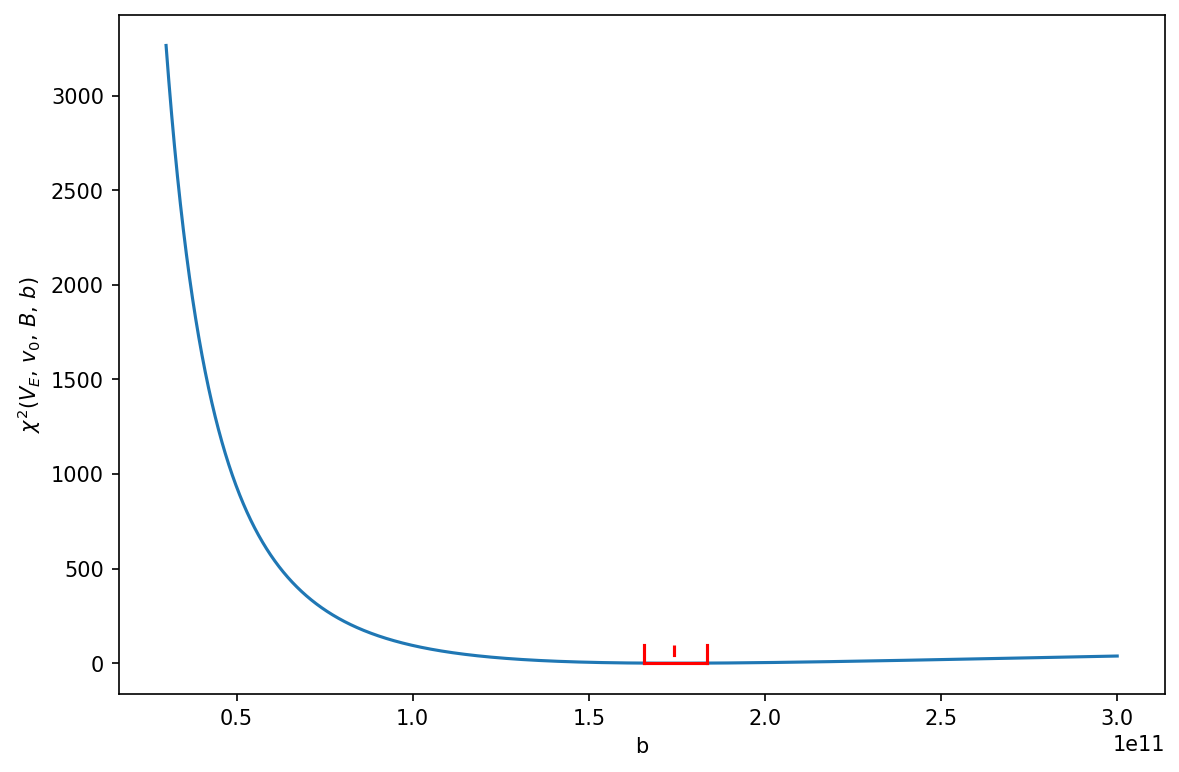

In [2371]:
b_att = minuit.values['b']
b_err_lo, b_err_up = minuit.merrors['b'].lower, minuit.merrors['b'].upper
plt.figure(figsize=(9,6), dpi=150)
plt.plot(b_int, f_like(b_int))
plt.xlabel('b')
plt.ylabel('$\chi^2(V_E,\, v_0, \, B,\, b)$')
plt.plot((b_att,b_att), (f_like(10**11), f_like(b_att)), color='r', linestyle='--')
plt.plot((b_att+b_err_lo,b_att+b_err_lo), (f_like(10**11), f_like(b_att+b_err_lo)), color='r')
plt.plot((b_att+b_err_up,b_att+b_err_up), (f_like(10**11), f_like(b_att+b_err_up)), color='r')
plt.plot((b_att+b_err_lo,b_att+b_err_up), (f_like(b_att+b_err_lo), f_like(b_att+b_err_up)), color='r')
plt.show()

In [2372]:
for p in minuit.params:
    print(p.name, "= {:.3f} {:.3f}/+{:.3f}".format(p.value/10**11, p.merror[0]/10**11, p.merror[1]/10**11), "10^11 C/kg")

b = 1.742 -0.085/+0.093 10^11 C/kg


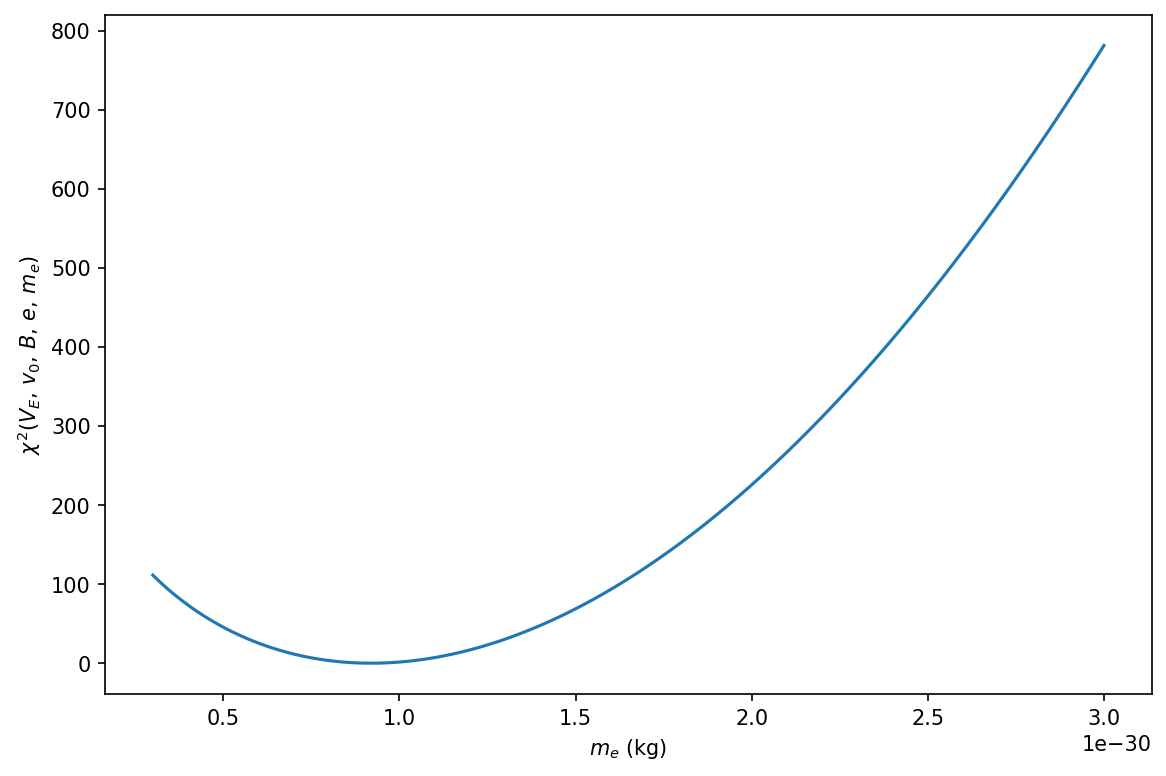

In [2373]:
e=m.values[1]
def f_like_m_e(m_e):
    chi=0
    for k in range(len(B)):
        chi=chi+((r[k]-(np.sqrt((v_0[k]*m_e)**2/e**2+2*V_E*m_e/e)/B[k]))/sigma_r[k])**2
    return chi
m_e_int= np.linspace(3e-31, 3e-30, 10000)
plt.figure(figsize=(9,6), dpi=150)
plt.plot(m_e_int, f_like_m_e(m_e_int))
plt.xlabel('$m_e$ (kg)')
plt.ylabel('$\chi^2(V_E,\, v_0, \, B,\, e,\, m_e)$')
plt.show()

In [2374]:
f_like_m.errordef = Minuit.LIKELIHOOD 
m_e_0 = 9e-31
minuit = Minuit(f_like_m_e, m_e=m_e_0)
minuit.limits=[(8e-31,1e-30)]
minuit.migrad()

<ipython-input-2374-a1531517c1bb>:5: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  minuit.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.494e-05                  │              Nfcn = 13               │
│ EDM = 1.49e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m_e  │ 0.92e-30  │ 0.06e-30  │            │            │  8e-31  │  1e-30  │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────┐
│     │      m_e │
├─────┼──────────┤
│ m_e │ 4.42e-63 │
└─────┴──────────┘

In [2375]:
minuit.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.494e-05                  │              Nfcn = 18               │
│ EDM = 1.49e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m_e  │ 0.92e-30  │ 0.06e-30  │            │            │  8e-31  │  1e-30  │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────┐
│     │      m_e │
├─────┼──────────┤
│ m_e │ 4.42e-63 │
└─────┴──────────┘

In [2376]:
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.494e-05                  │              Nfcn = 18               │
│ EDM = 1.49e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m_e  │ 0.92e-30  │ 0.06e-30  │ -0.12e-30  │  0.08e-30  │  8e-31  │  1e-30  │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          m_e          │
├──────────┼───────────┬───────────┤
│  Error   │ -0.12e-30 │ 0.08e-30  │
│  Valid   │   True    │   True    │
│ At Limit │   True    │   True    │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌─────┬──────────┐
│     │      m_e │
├─────┼──────────┤
│ m_e │ 4.42e-63 │
└─────┴──────────┘

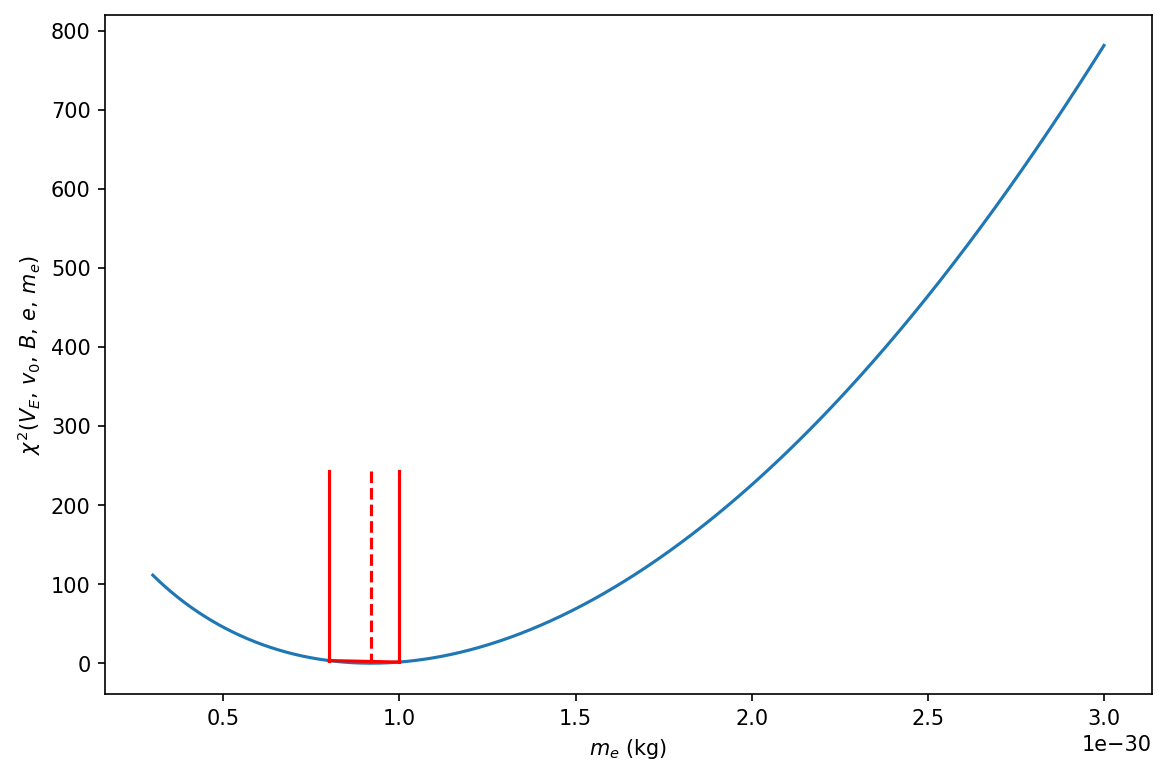

In [2377]:
m_e_att = minuit.values['m_e']
m_e_err_lo, m_e_err_up = minuit.merrors['m_e'].lower, minuit.merrors['m_e'].upper
plt.figure(figsize=(9,6), dpi=150)
plt.plot(m_e_int, f_like_m_e(m_e_int))
plt.xlabel('$m_e$ (kg)')
plt.ylabel('$\chi^2(V_E,\, v_0, \, B,\, e,\, m_e)$')
plt.plot((m_e_att,m_e_att), (f_like_m_e(1e-31), f_like_m_e(m_e_att)), color='r', linestyle='--')
plt.plot((m_e_att+m_e_err_lo,m_e_att+m_e_err_lo), (f_like_m_e(1e-31), f_like_m_e(m_e_att+m_e_err_lo)), color='r')
plt.plot((m_e_att+m_e_err_up,m_e_att+m_e_err_up), (f_like_m_e(1e-31), f_like_m_e(m_e_att+m_e_err_up)), color='r')
plt.plot((m_e_att+m_e_err_lo,m_e_att+m_e_err_up), (f_like_m_e(m_e_att+m_e_err_lo), f_like_m_e(m_e_att+m_e_err_up)), color='r')
plt.show()

In [2378]:
for p in minuit.params:
    print(p.name, "= {:.3f} {:.3f}/+{:.3f}".format(p.value/1e-31, p.merror[0]/1e-31, p.merror[1]/1e-31), " E-31 kg.")

m_e = 9.192 -1.192/+0.808  E-31 kg.


Il gruppo di ricerca, per giustificare la sottostima da loro ottenuta del rapporto carica-massa, sostiene che all'interno del solenoide utilizzato si sia creata della magnetizzazione ferromagnetica nelle apparechiature utilizzate. Questo fenomeno è sicuramente riscontrabile, ma non è la causa della sottostima come abbiamo potuto evincere dalle analisi precedenti.\
Il campo magnetico (modulo) nel centro di un solenoide finito di $N=530$ spire, di lunghezza $L=15.2\, cm$ e di diametro $D=4.7\, cm$ è dato da:

$$B_S=\dfrac{\mu_0\,N\,i_E}{\sqrt{D^2+L^2}}$$

dove $\mu_0=4\,\pi\cdot10^{-7}\, \dfrac{N}{A^2}$ è la permeabilità magnetica del vuoto.\
Grafichiamo quindi $B_S$ teorico, $B$ misurato in funzione della corrente $i_E$:

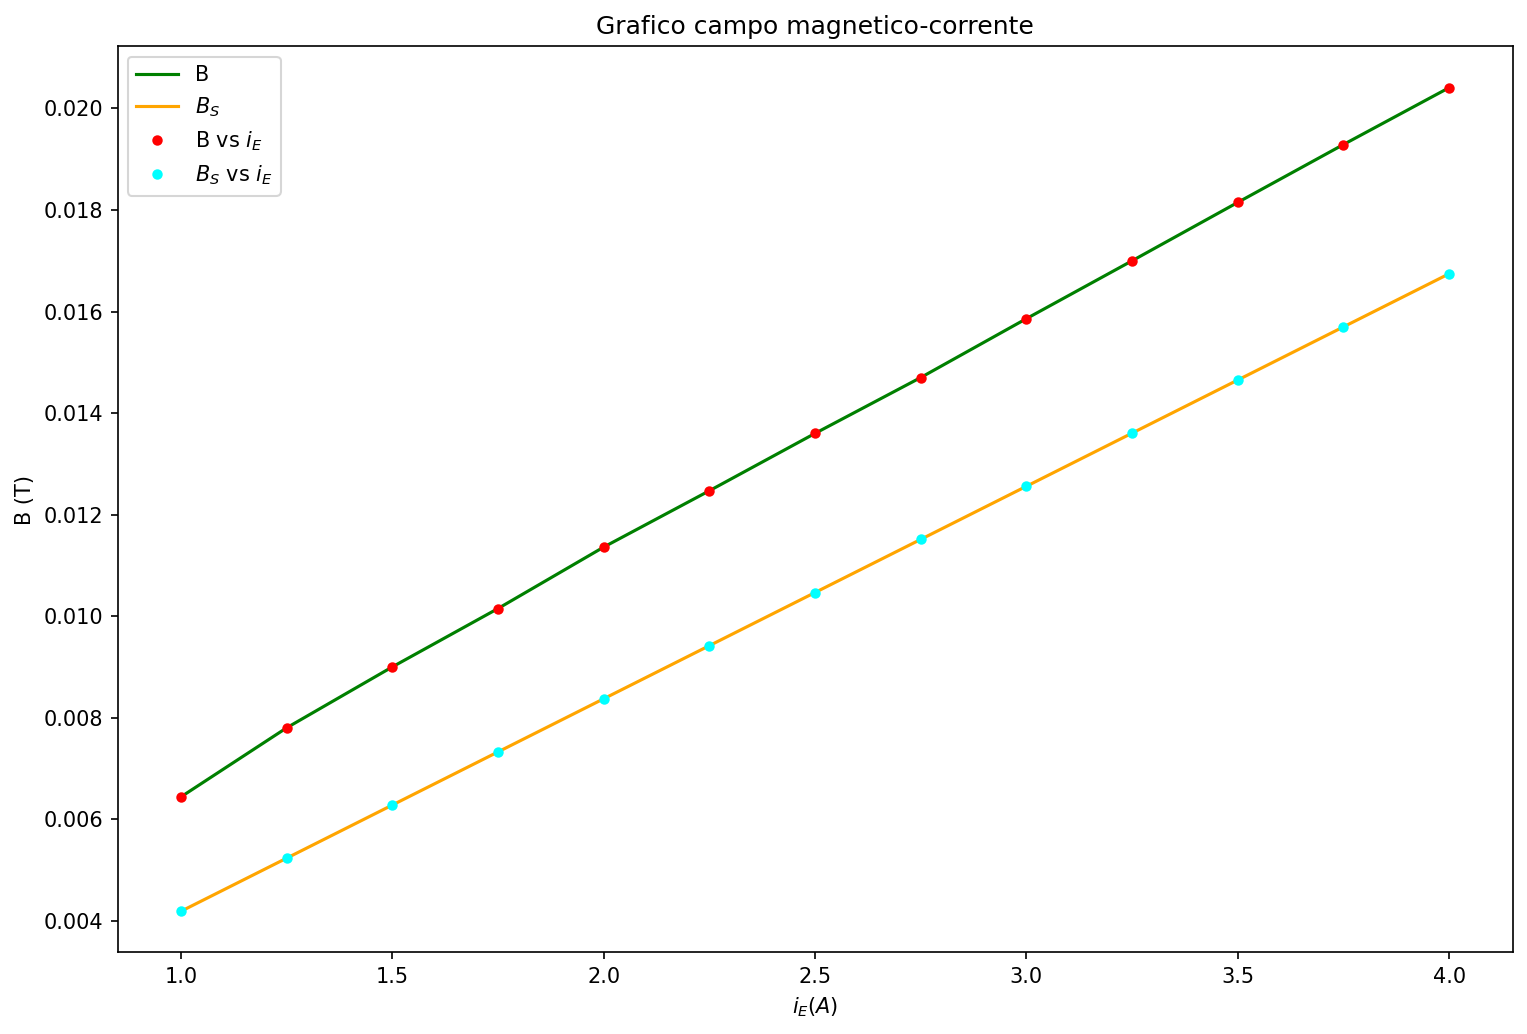

In [2381]:
def B_S(i,N,D,L,u_0):
    B_s=u_0*N*i/(D**2+L**2)**(1/2)
    return B_s
i=np.array(df['$i_E$ (A)'])
L=0.152
D=0.047
N=530
u_0=4*(np.pi)*10**(-7)
B_s=B_S(i,N,D,L,u_0)
plt.figure(figsize=(12,8), dpi=150)
plt.errorbar(i, B, fmt="o", label="B vs $i_E$", color='red', marker='o', markersize=4, linestyle='')
plt.errorbar(i, B_s, fmt="o", label="$B_S$ vs $i_E$", color='cyan', marker='o', markersize=4, linestyle='')
plt.plot(i,B,label='B', color='green')
plt.plot(i, B_s, color='orange',label='$B_S$')
plt.xlabel('$i_E (A)$')
plt.ylabel('B (T)')
plt.title('Grafico campo magnetico-corrente')
plt.legend()
plt.show()

Dal grafico si può vedere la presenza di una discrepanza evidente e sistematica fra campo teorico del solenoide e campo misurato dalla sonda Hall.\
Per definizione il modulo della magnetizazzione è dato da $M_B=\dfrac{B}{\mu_0}-H$, dove $H$ è il campo ausiliario (spostamento magnetico...) che è relazione solo con le correnti libere tramite la quarta equazione di Maxwell nella materia:

$$\nabla\times \vec{H}=\vec{j}_{free}+\dfrac{\partial \vec{D}}{\partial t}$$

Se supponiamo correnti stazionarie:

$$\nabla\times \vec{H}=\vec{j}_{free}$$

Sappiamo che la simmetria su cui scorrono le correnti è la stessa del solenoide, dunque nel suo centro vale:

$$H=\dfrac{N\,i_E}{\sqrt{D^2+L^2}}$$

Grafichiamo quindi $M_B$ in funzione di $H$:

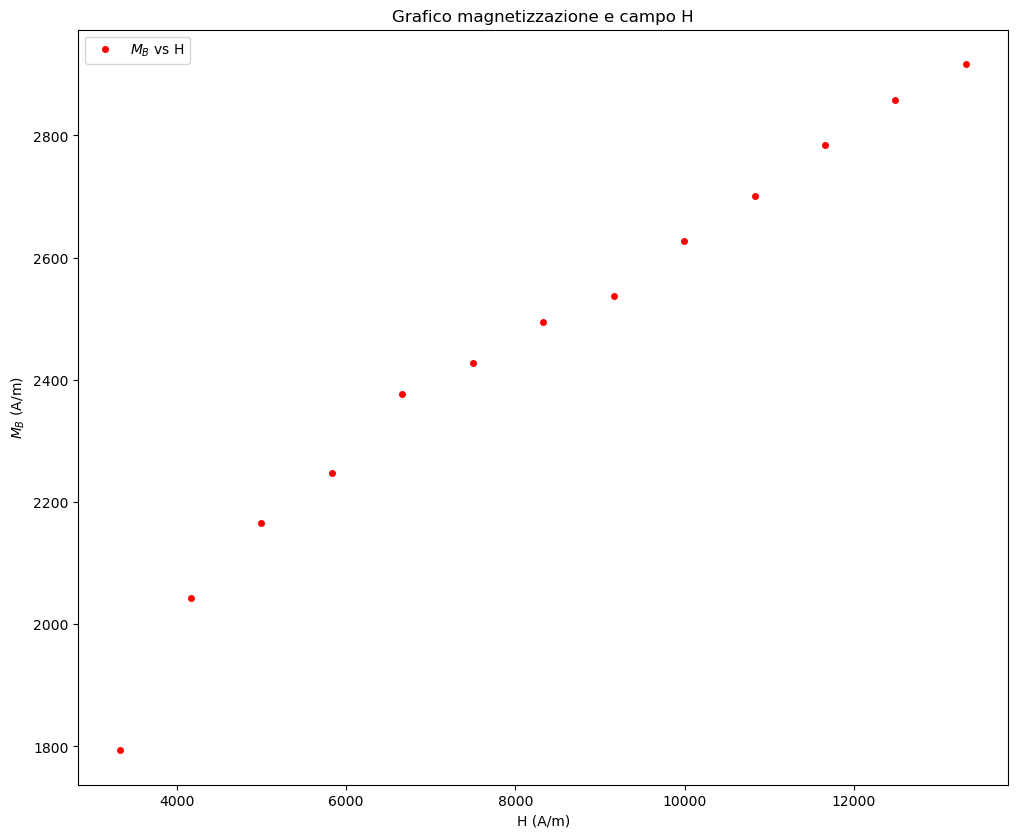

In [2383]:
def h(i,N,D,L):
    H=N*i/(D**2+L**2)**(1/2)
    return H
def M_b(B,H,u_0):
    M_B=B/u_0-H
    return M_B
H=h(i,N,D,L)
M_B=M_b(B,H,u_0)
plt.figure(figsize=(12,10), dpi=100)
plt.errorbar(H, M_B, fmt="o", label="$M_B$ vs H", color='red', marker='o', markersize=4, linestyle='')
plt.xlabel('H (A/m)')
plt.ylabel('$M_B$ (A/m)')
plt.title('Grafico magnetizzazione e campo H')
plt.legend()
plt.show()

L'andamento dei punti mostra di essere fortemente non lineare e, poiché non conosciamo il modello teorico che regola la magnetizzazione all'interno dei ferromagneti, non ci resta che applicare un fit polinomiale.\
Faremo prima un test con polinomi "normali" (cioé proviamo ad indovinare la serie di Taylor della curva) e poi con i polinomi di Chebyshev, essendo i valori della magnetizzazione molto elevati.

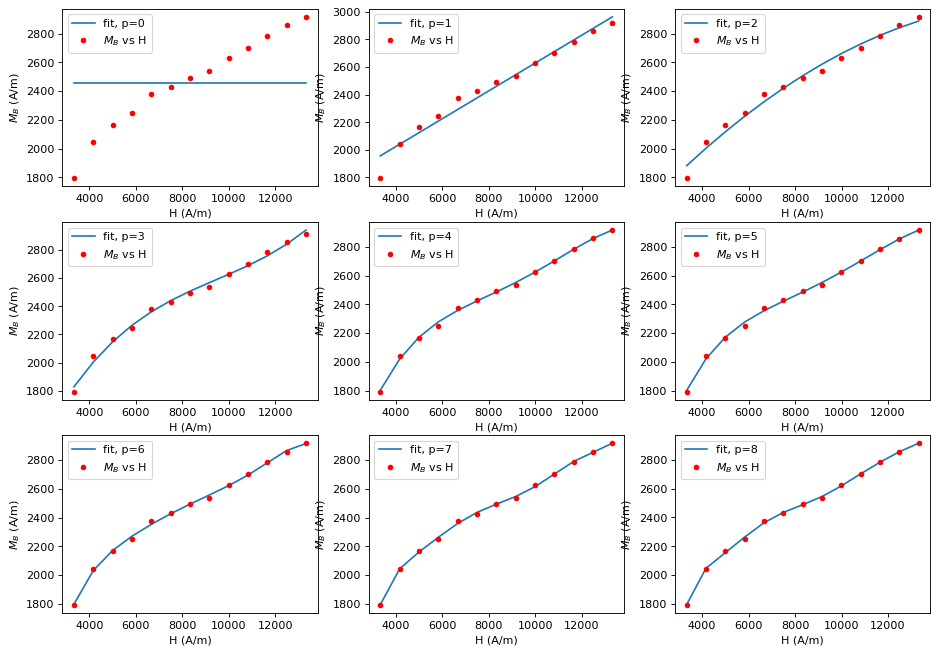

In [2384]:
from scipy.optimize import curve_fit
def poli(x, *par):
    return np.polyval(par, x)
nx, ny = 3, 3
fig, axs = plt.subplots(ny, nx, figsize=(14,10), dpi=80)
for p, ax in zip(range(nx*ny), axs.reshape(-1)):
    par, cov = curve_fit(poli, H, M_B, p0=np.zeros(p+1))
    fit_M_B = poli(H, *par)
    ax.plot(H, fit_M_B, label='fit, p={:d}'.format(p))
    ax.errorbar(H, M_B, fmt="o", label="$M_B$ vs H", color='red', marker='o', markersize=4, linestyle='')
    ax.set_xlabel('H (A/m)')
    ax.set_ylabel('$M_B$ (A/m)')
    ax.legend()
plt.show()

In [2385]:
print("I paramentri dell'ultimo fit polinomiale sono: ", par)

I paramentri dell'ultimo fit polinomiale sono:  [-1.93651928e-27  1.39065143e-22 -4.26849766e-18  7.29542663e-14
 -7.57496947e-10  4.88307410e-06 -1.90682125e-02  4.13782400e+01
 -3.63740042e+04]


Questi sono i vari grafici di polinomi che approssimano l'andamento della curva di isteresi, tuttavia non conoscendo il modello vero non è noto se siamo andati in "overfiting". Proviamo ora ad usare i Polinomi di Chebyshev:

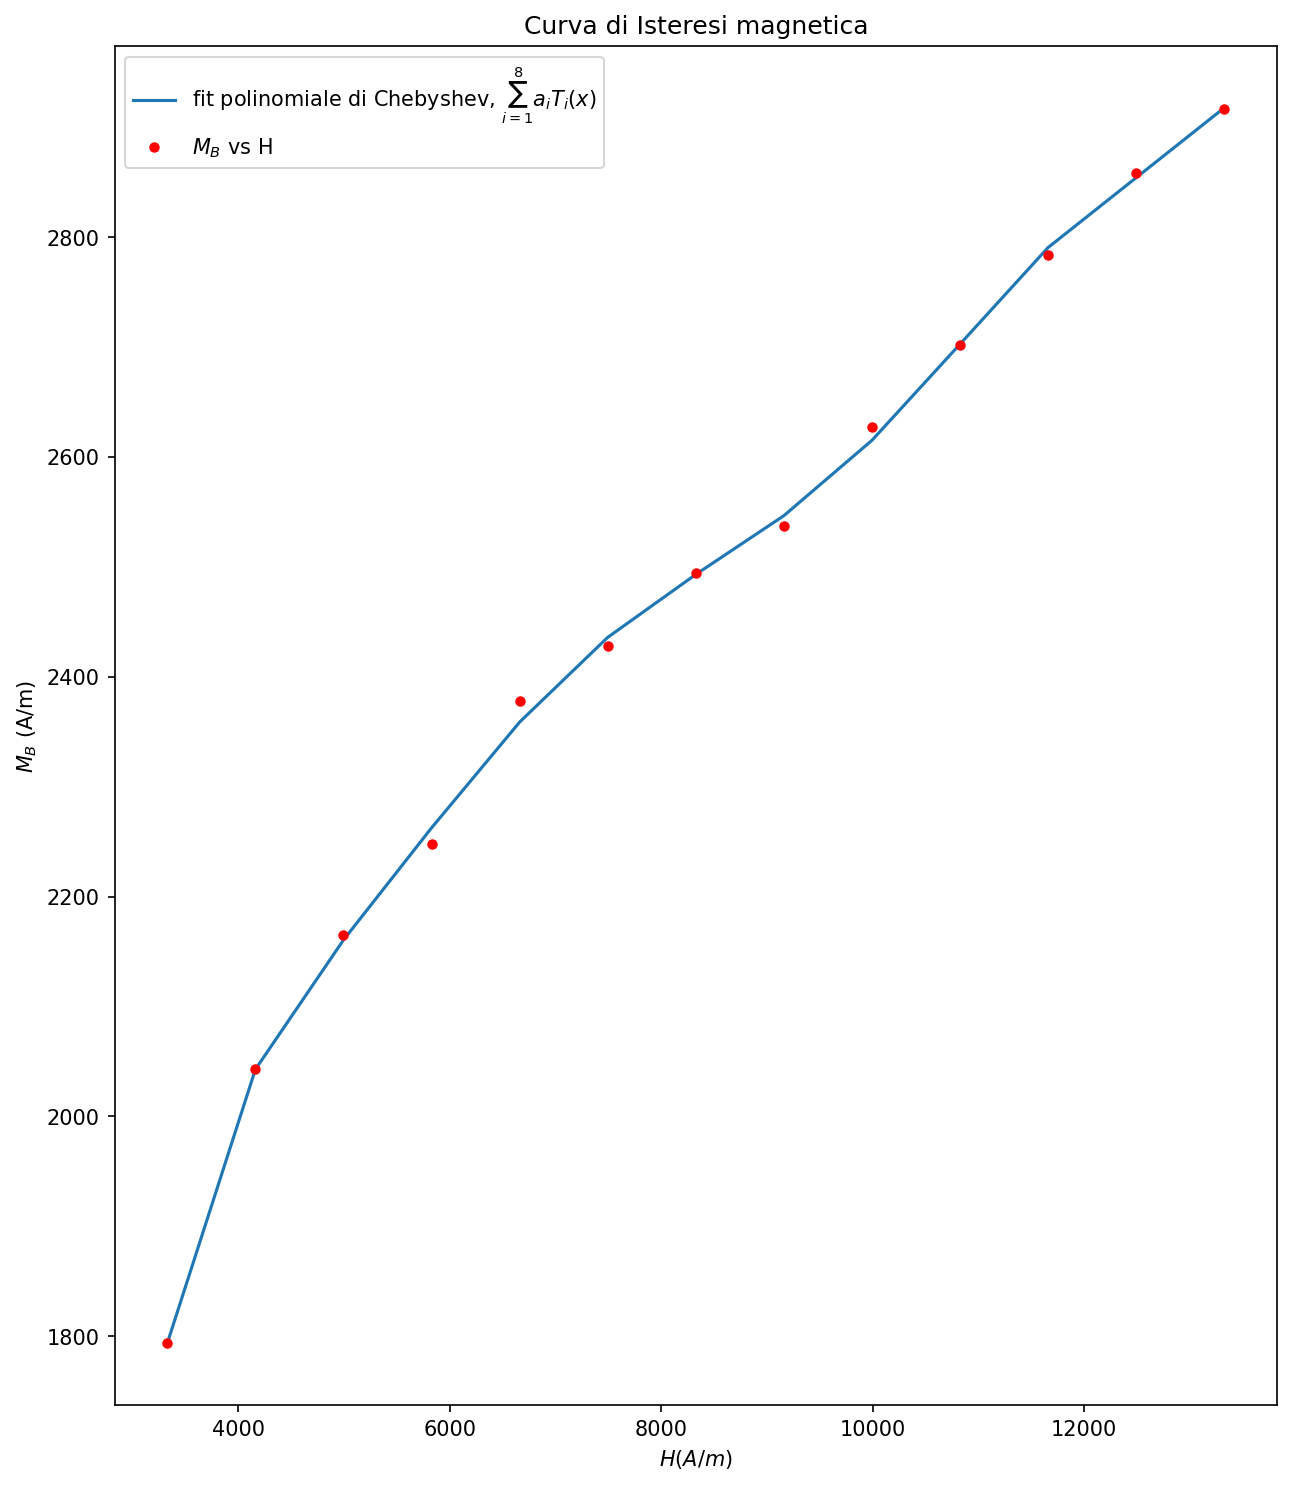

I parametri dei polinomii di Chebyshev sono:  [  450.69615673  6559.29898184 -3136.49577662  3810.13841005
 -1436.73007154  1540.91048893  -321.73649221   329.17954054]


In [2386]:
from numpy.polynomial.chebyshev import Chebyshev
def poli_c(x, *par):
    return Chebyshev(par)((x/8000)-1)
par, cov = curve_fit(poli_c, H, M_B, p0=[1,0,0,0,0,0,0,0])
fig, ax = plt.subplots(figsize=(10,12), dpi=150)
fit_M_B = poli_c(H, *par)
ax.plot(H, fit_M_B, label='fit polinomiale di Chebyshev, $\sum_{i=1}^8 a_i T_i(x)$')
ax.errorbar(H, M_B, fmt="o", label="$M_B$ vs H", color='red', marker='o', markersize=4, linestyle='')
ax.set_xlabel('$H (A/m)$')
ax.set_ylabel('$M_B$ (A/m)')
ax.legend()
plt.title('Curva di Isteresi magnetica')
plt.show()
print("I parametri dei polinomii di Chebyshev sono: ", par)

Oltre ad osservare l'inizio di una ciclo di isteresi non possiamo dire altro poiché il ferromagnete è ancora in fase di accrescimento in termini di magnetizzazione per quanto si evince dall'andamento nella parte finale del grafico. Questo vuol dire che i domini di Weiss ancora non si sono del tutto allineati e quindi ancora non si è raggiunti la magnetizzazione massima di saturazione.

Con questa ultima osservazione concludiamo questa seconda parte del progetto, affermando che il gruppo di ricerca ha ottenuto una sottostima del rapporto carica-massa dell'elettrone a causa del "basso" voltaggio dell'anodo rispetto alle energie cinetiche iniziali di emissione degli elettroni per effetto termoionico. La nostra stima considerando questo fattore è considerevolmente più vicina al valore misurato dal CODATA e l'intervallo di confidenza è consistente con i valori del CODATA: 
$\dfrac{e}{m_e}=(1.776\, \pm \, 0.129)\cdot 10^{11}\, \dfrac{C}{kg}$.

Da questa stima e dalla stima ottenuta dall'esperimento di Millikan della carica elettrica elementare, si può ottenere la massa dell'elettrone: ${m_e}=(9.02\, \pm \, 0.75)\cdot 10^{-31}\, {kg}$.

La distribuzione delle velocità non è molto apprezzabile a causa dell'esiguo numero di misure ed il test di Kolmogorov-Smirnov è risultato molto incline all'ipotesi alternativa, cioè di non essere una Maxwell-Boltzmann (probabilmente a causa delle poche misure effettuate), tuttavia si possono ottenere delle stime della temperatura e del potenziale di estrazione del metallo applicando una minimizzazione degli scarti quadratici fra la c.d.f. teorica e la funzione a gradino generata dai dati.\
La tempratura del metallo raggiunta nell'effetto termoionico si stima essere: $T=(1294\, \pm \, 251)\, K)$; mentre il suo potenziale di estrazione è: $V_{est}=(2.13\, \pm \, 0.23)\, V$.

La curva di isteresi dei componenti metallici ferromagnetici nel solenoide è apprezzabile ma ancora non ha raggiunto il limite di saturazione massima, pertanto possiamo solo osservare l'andamento qualitativo della magnetizzazione indotta.

## Bibliografia:

[Esperimento di Thomson](https://farelaboratorio.accademiadellescienze.it/experiences/618/additions/740)

[Esperimanto di Millikan](https://aapt.scitation.org/)

[Moto Browniano](https://www.bo.infn.it/~apesci/Cossetto.pdf)

[Effetto Termoionico](https://www.researchgate.net/publication/233990974)

[Potenziali di Estrazione](http://www.museoscuolamorcone.com/atuttoportale/articoli/elettronica/TubiTermoionici.pdf)